In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("Midfielders.csv")

pd.set_option("display.max_columns", None)

df.head()
df.shape
df.info()
df.isna().mean().sort_values(ascending=False)
df.columns = df.columns.str.strip()
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 92 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Player                               590 non-null    object 
 1   Season                               590 non-null    object 
 2   Age                                  590 non-null    int64  
 3   Team                                 590 non-null    object 
 4   Goals                                590 non-null    float64
 5   Assist                               590 non-null    float64
 6   G+A                                  590 non-null    float64
 7   Non_penalty_goals                    590 non-null    float64
 8   Penalty_kicks-made                   590 non-null    float64
 9   Penalty_kicks_attempted              590 non-null    float64
 10  Expected_goals                       590 non-null    float64
 11  Non_penalty_xG                  

In [11]:
df["Role"].value_counts()


Role
CM    161
DM    147
RW     94
LW     93
AM     81
RM     12
LM      2
Name: count, dtype: int64

In [13]:
OFFENSIVE_MID_ROLES = [
    "AM",
    "LW",
    "RW",
    "Wide Midfielder"
]

DEFENSIVE_MID_ROLES = [
    "DM",
    "CM",
    "RM",
    "LM",
]


In [15]:
def map_midfield_group(role):
    if role in OFFENSIVE_MID_ROLES:
        return "offensive_mid"
    elif role in DEFENSIVE_MID_ROLES:
        return "defensive_mid"
    else:
        return np.nan

df["mid_group"] = df["Role"].apply(map_midfield_group)

df["mid_group"].value_counts(dropna=False)


mid_group
defensive_mid    322
offensive_mid    268
Name: count, dtype: int64

In [17]:
off_mid = df[df["mid_group"] == "offensive_mid"].copy()
def_mid = df[df["mid_group"] == "defensive_mid"].copy()

print("off_mid shape:", off_mid.shape)
print("def_mid shape:", def_mid.shape)


off_mid shape: (268, 93)
def_mid shape: (322, 93)


In [19]:
off_mid.to_csv("OffensiveMidfielders.csv", index=False)
def_mid.to_csv("DefensiveMidfielders.csv", index=False)


In [21]:
print("\nOFF MID Tier_league balance:")
print(off_mid["Tier_league"].value_counts(dropna=False))
print(off_mid["Tier_league"].value_counts(normalize=True, dropna=False))

print("\nDEF MID Tier_league balance:")
print(def_mid["Tier_league"].value_counts(dropna=False))
print(def_mid["Tier_league"].value_counts(normalize=True, dropna=False))



OFF MID Tier_league balance:
Tier_league
0    203
1     65
Name: count, dtype: int64
Tier_league
0    0.757463
1    0.242537
Name: proportion, dtype: float64

DEF MID Tier_league balance:
Tier_league
0    246
1     76
Name: count, dtype: int64
Tier_league
0    0.763975
1    0.236025
Name: proportion, dtype: float64


In [23]:
def missing_report(df_in, name, top_n=20):
    miss = df_in.isna().mean().sort_values(ascending=False)
    miss = miss[miss > 0]
    print(f"\n{name} missingness (top {top_n}):")
    print(miss.head(top_n))

missing_report(off_mid, "OFF MID")
missing_report(def_mid, "DEF MID")



OFF MID missingness (top 20):
Shots_onTarget            0.003731
Goals_perShot_onTarget    0.003731
dtype: float64

DEF MID missingness (top 20):
Goals_perShot_onTarget    0.083851
dtype: float64


In [25]:
off_mid.dtypes.value_counts()


float64    86
object      5
int64       2
Name: count, dtype: int64

In [27]:
off_mid.select_dtypes(exclude=["number"]).columns.tolist()


['Player', 'Season', 'Team', 'Role', 'mid_group']

In [29]:
ID_COLS = ["Player", "Season", "Team", "Role"]

# Drop mid_group
off_mid = off_mid.drop(columns=["mid_group"])
def_mid = def_mid.drop(columns=["mid_group"])


### Off_mid feature inspection ###

In [31]:
FEATURE_COLS = [c for c in off_mid.columns 
                if c not in ID_COLS + ["Tier_league"]]


In [33]:
zero_frac = (off_mid[FEATURE_COLS] == 0).mean().sort_values(ascending=False)
zero_frac.head(20)


Red_cards                       0.895522
Mistakes_leadto_shot            0.873134
Penalty_kicks-made              0.865672
Penalty_kicks_attempted         0.832090
Blocking_shots                  0.477612
Assists-expGoals_assisted       0.455224
Goals-Expected_goals            0.432836
Passes_behind_defenders         0.212687
Corner_kikcs                    0.190299
Offsides                        0.167910
Non_penalty_goals               0.130597
Yellow_cards                    0.126866
Goals                           0.123134
Swing_passes                    0.119403
Assist                          0.119403
Goals_perShot_onTarget          0.115672
Passes_freeKick                 0.111940
Non_penalty_expGoals_perShot    0.104478
Crosses_into18yard_box          0.097015
Goals_per_shot                  0.089552
dtype: float64

In [38]:
from sklearn.feature_selection import VarianceThreshold

FEATURE_COLS = [c for c in off_mid.columns 
                if c not in ID_COLS + ["Tier_league"]]

variances = off_mid[FEATURE_COLS].var().sort_values()

variances.head(20)


Mistakes_leadto_shot                   0.001112
Red_cards                              0.001223
Penalty_kicks-made                     0.002599
Penalty_kicks_attempted                0.003678
Non_penalty_expGoals_perShot           0.004712
Blocking_shots                         0.005697
Expected_assists                       0.006101
Expected_assisted_goals                0.008428
Assists-expGoals_assisted              0.009402
Goals-Expected_goals                   0.009729
Non_penalty_xG                         0.010001
Yellow_cards                           0.011963
Assist                                 0.015588
Expected_goals                         0.016720
Non_penalty_goals                      0.019806
Non_penalty_expGoals+assisted_goals    0.021926
Goals                                  0.026795
Goals_perShot_onTarget                 0.026974
xG+xAssisted_G                         0.030858
PassLive_lead_goal                     0.036887
dtype: float64

In [58]:
DROP_COLS_OFF_MID = [
    "Mistakes_leadto_shot",
    "Red_cards",
    "Penalty_kicks_made",
    "Penalty_kicks_attempted",
    "Yellow_cards",
    "Blocking_shots"
]
off_mid = off_mid.drop(columns=DROP_COLS_OFF_MID)


In [71]:
ID_COLS = ["Player", "Season", "Team", "Role"]
TARGET_COL = "Tier_league"

FEATURE_COLS_OFF = [
    c for c in off_mid.columns
    if c not in ID_COLS + [TARGET_COL]
]

print("OFF MID – number of features:", len(FEATURE_COLS_OFF))
FEATURE_COLS_OFF


OFF MID – number of features: 81


['Age',
 'Goals',
 'Assist',
 'G+A',
 'Non_penalty_goals',
 'Expected_goals',
 'Non_penalty_xG',
 'Expected_assisted_goals',
 'xG+xAssisted_G',
 'Expected_assists',
 'Non_penalty_expGoals+assisted_goals',
 'Goals-Expected_goals',
 'Assists-expGoals_assisted',
 'Non_penalty_expGoals_perShot',
 'Shot_/90',
 'Goals_per_shot',
 'Goals_perShot_onTarget',
 'Shots_onTarget',
 'Shots_onTarget%',
 'Passes_completed',
 'Passes_attempted',
 'Passes_completition%',
 'Passes_toShot',
 'Passes_into_last3rd',
 'Passes_into18yard_box',
 'Crosses_into18yard_box',
 'Progressive_passes',
 'TotDist_completed_passes',
 'TotProgressive_passes',
 'Completed_short_passes',
 'Attempted_short_passes',
 'Short_passes_Cmp%',
 'Completed_medium_passes',
 'Attempted_medium_passes',
 'Medium_pass_Cmp%',
 'Completed_long_passes',
 'Attempted_long_passes',
 'Long_passes_Cmp%',
 'Carries/90',
 'TotDist_Carries',
 'PrgDist_Carries',
 'Carries_10yards_forward',
 'Carries_into_final_third',
 'Carries_into18yard_box',
 'Mi

### Def_mid feature inspection ###

In [61]:
FEATURE_COLS = [c for c in def_mid.columns 
                if c not in ID_COLS + ["Tier_league"]]


In [63]:
zero_frac = (def_mid[FEATURE_COLS] == 0).mean().sort_values(ascending=False)
zero_frac.head(20)

Penalty_kicks-made           0.962733
Penalty_kicks_attempted      0.953416
Red_cards                    0.897516
Offsides                     0.692547
Mistakes_leadto_shot         0.683230
Assists-expGoals_assisted    0.680124
Goals-Expected_goals         0.639752
Corner_kikcs                 0.568323
Non_penalty_goals            0.568323
Goals                        0.552795
Assist                       0.453416
Expected_assists             0.431677
Goals_per_shot               0.419255
Non_penalty_xG               0.413043
Crosses_into18yard_box       0.409938
Expected_goals               0.403727
Expected_assisted_goals      0.397516
Goals_perShot_onTarget       0.350932
Passes_behind_defenders      0.295031
G+A                          0.263975
dtype: float64

In [65]:
from sklearn.feature_selection import VarianceThreshold

FEATURE_COLS = [c for c in def_mid.columns 
                if c not in ID_COLS + ["Tier_league"]]

variances = def_mid[FEATURE_COLS].var().sort_values()

variances.head(20)


Red_cards                              0.000923
Penalty_kicks-made                     0.001028
Penalty_kicks_attempted                0.001475
Non_penalty_expGoals_perShot           0.002046
Mistakes_leadto_shot                   0.003450
Non_penalty_xG                         0.003908
Assists-expGoals_assisted              0.004236
Goals-Expected_goals                   0.004240
Expected_assists                       0.004292
Expected_goals                         0.004775
Expected_assisted_goals                0.004987
Non_penalty_goals                      0.005639
Goals                                  0.006885
Non_penalty_expGoals+assisted_goals    0.008651
Assist                                 0.008657
Offsides                               0.008953
xG+xAssisted_G                         0.010047
PassLive_lead_goal                     0.016274
Yellow_cards                           0.016483
G+A                                    0.016982
dtype: float64

In [69]:
DROP_COLS_DEF_MID = [
    "Penalty_kicks-made",
    "Penalty_kicks_attempted",
    "Red_cards",
    "Mistakes_leadto_shot",
    "Offsides",
    "Goals-Expected_goals",
    "Assists-expGoals_assisted",
    "Yellow_cards"
]
def_mid = def_mid.drop(columns=DROP_COLS_DEF_MID)


In [73]:
FEATURE_COLS_DEF = [
    c for c in def_mid.columns
    if c not in ID_COLS + [TARGET_COL]
]

print("DEF MID – number of features:", len(FEATURE_COLS_DEF))
FEATURE_COLS_DEF


DEF MID – number of features: 79


['Age',
 'Goals',
 'Assist',
 'G+A',
 'Non_penalty_goals',
 'Expected_goals',
 'Non_penalty_xG',
 'Expected_assisted_goals',
 'xG+xAssisted_G',
 'Expected_assists',
 'Non_penalty_expGoals+assisted_goals',
 'Non_penalty_expGoals_perShot',
 'Shot_/90',
 'Goals_per_shot',
 'Goals_perShot_onTarget',
 'Shots_onTarget',
 'Shots_onTarget%',
 'Passes_completed',
 'Passes_attempted',
 'Passes_completition%',
 'Passes_toShot',
 'Passes_into_last3rd',
 'Passes_into18yard_box',
 'Crosses_into18yard_box',
 'Progressive_passes',
 'TotDist_completed_passes',
 'TotProgressive_passes',
 'Completed_short_passes',
 'Attempted_short_passes',
 'Short_passes_Cmp%',
 'Completed_medium_passes',
 'Attempted_medium_passes',
 'Medium_pass_Cmp%',
 'Completed_long_passes',
 'Attempted_long_passes',
 'Long_passes_Cmp%',
 'Carries/90',
 'TotDist_Carries',
 'PrgDist_Carries',
 'Carries_10yards_forward',
 'Carries_into_final_third',
 'Carries_into18yard_box',
 'Miscontrols',
 'Dispossesd',
 'Received',
 'Prg_passes_re

### Flags and correlation analisys 

In [76]:
off_mid = off_mid.copy()

off_mid["has_shot"] = (off_mid["Shot_/90"] > 0).astype(int)
off_mid["has_sot"] = (off_mid["Shots_onTarget"] > 0).astype(int)
off_mid["has_goal"] = (off_mid["Goals"] > 0).astype(int)
off_mid["has_assist"] = (off_mid["Assist"] > 0).astype(int)
off_mid["has_key_pass"] = (off_mid["Passes_toShot"] > 0).astype(int)
off_mid["has_sca"] = (off_mid["Shot_creating_actions"] > 0).astype(int)
off_mid["has_gca"] = (off_mid["Goal_creating_actions"] > 0).astype(int)
off_mid["has_carry_final_third"] = (off_mid["Carries_into_final_third"] > 0).astype(int)
off_mid["has_carry_box"] = (off_mid["Carries_into18yard_box"] > 0).astype(int)

def_mid = def_mid.copy()

def_mid["has_shot"] = (def_mid["Shot_/90"] > 0).astype(int)
def_mid["has_goal"] = (def_mid["Goals"] > 0).astype(int)
def_mid["has_assist"] = (def_mid["Assist"] > 0).astype(int)
def_mid["has_key_pass"] = (def_mid["Passes_toShot"] > 0).astype(int)
def_mid["has_tackle"] = (def_mid["Tackles_won"] > 0).astype(int)
def_mid["has_interception"] = (def_mid["Interceptions"] > 0).astype(int)
def_mid["has_block"] = (
    (def_mid["Blocking_shots"] + def_mid["Blocking_pass"]) > 0
).astype(int)


In [78]:
flag_cols_off = [
    "has_shot", "has_sot", "has_goal", "has_assist",
    "has_key_pass", "has_sca", "has_gca",
    "has_carry_final_third", "has_carry_box"
]

off_mid[flag_cols_off].mean().sort_values(ascending=False)


has_shot                 1.000000
has_key_pass             1.000000
has_carry_box            1.000000
has_carry_final_third    1.000000
has_gca                  0.981343
has_sca                  0.981343
has_sot                  0.966418
has_assist               0.880597
has_goal                 0.876866
dtype: float64

In [82]:
flag_cols_def = [
    "has_shot", "has_goal", "has_assist",
    "has_key_pass", "has_tackle",
    "has_interception", "has_block"
]

def_mid[flag_cols_def].mean().sort_values(ascending=False)


has_shot            1.000000
has_tackle          1.000000
has_key_pass        1.000000
has_interception    1.000000
has_block           1.000000
has_assist          0.546584
has_goal            0.447205
dtype: float64

In [85]:
ID_COLS = ["Player", "Season", "Team", "Role"]
TARGET = "Tier_league"

FEATURES_OFF = [
    c for c in off_mid.columns
    if c not in ID_COLS + [TARGET]
]

FEATURES_DEF = [
    c for c in def_mid.columns
    if c not in ID_COLS + [TARGET]
]


In [87]:
corr_off = (
    off_mid[FEATURES_OFF]
    .corrwith(off_mid[TARGET])
    .sort_values(key=lambda x: x.abs(), ascending=False)
)

corr_off.head(20)


C:\Users\jsava\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jsava\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


PassLive_lead_goal                     0.448784
G+A                                    0.412894
Non_penalty_expGoals+assisted_goals    0.388644
xG+xAssisted_G                         0.380381
Passes_behind_defenders                0.372528
Assist                                 0.329871
Touches_Att_Pen                        0.328326
Attempted_short_passes                 0.316311
Goals                                  0.308043
Live_ball_passes                       0.305999
Expected_assisted_goals                0.302099
Expected_goals                         0.293486
Passes_completed                       0.278900
Touches/90                             0.278220
Touches_Live                           0.277729
Expected_assists                       0.275939
Non_penalty_goals                      0.270813
Touches_Att_3rd                        0.267972
Assists-expGoals_assisted              0.261921
Passes_attempted                       0.259710
dtype: float64

In [89]:
corr_def = (
    def_mid[FEATURES_DEF]
    .corrwith(def_mid[TARGET])
    .sort_values(key=lambda x: x.abs(), ascending=False)
)

corr_def.head(20)


C:\Users\jsava\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jsava\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TotDist_Carries             0.455914
Touches_Live                0.451628
Touches/90                  0.451453
Touches_Mid_3rd             0.451078
Attempted_short_passes      0.447112
Live_ball_passes            0.443778
Passes_attempted            0.441415
Received                    0.440859
Passes_completed            0.434829
Carries/90                  0.412303
Passes_into_last3rd         0.408865
Progressive_passes          0.392474
TotDist_completed_passes    0.382339
Attempted_medium_passes     0.367526
PrgDist_Carries             0.354373
Passes_behind_defenders     0.328699
PassLive_lead_goal          0.290448
Shot_creating_actions       0.247818
Passes_completition%        0.237317
Long_passes_Cmp%            0.228700
dtype: float64

In [91]:
DROP_FLAGS_OFF = [
    "has_shot",
    "has_key_pass",
    "has_carry_box",
    "has_carry_final_third",
    "has_sca",
    "has_gca"
]

off_mid = off_mid.drop(columns=DROP_FLAGS_OFF)


In [93]:
DROP_FLAGS_DEF = [
    "has_shot",
    "has_tackle",
    "has_interception",
    "has_block",
    "has_key_pass"
]

def_mid = def_mid.drop(columns=DROP_FLAGS_DEF)


In [95]:
import numpy as np

ID_COLS = ["Player", "Season", "Team", "Role"]
TARGET = "Tier_league"

NUM_FEATURES_OFF = [
    c for c in off_mid.columns
    if c not in ID_COLS + [TARGET]
]

NUM_FEATURES_DEF = [
    c for c in def_mid.columns
    if c not in ID_COLS + [TARGET]
]

corr_matrix_off = off_mid[NUM_FEATURES_OFF].corr().abs()
corr_matrix_def = def_mid[NUM_FEATURES_DEF].corr().abs()


In [105]:
def get_high_corr_pairs(corr_matrix, threshold=0.9):
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    return (
        upper.stack()
        .reset_index()
        .rename(columns={"level_0": "f1", "level_1": "f2", 0: "corr"})
        .query("corr >= @threshold")
        .sort_values("corr", ascending=False)
    )

high_corr_off = get_high_corr_pairs(corr_matrix_off, 0.9)
high_corr_def = get_high_corr_pairs(corr_matrix_def, 0.9)

high_corr_off.head(30)


,f1,f2,corr
3446,Touches/90,Touches_Live,0.999985
3420,Succ_Takes_on%,Tkld_During_Take_On%,0.999747
1607,Passes_toShot,Completed_long_passes,0.998027
1604,Passes_toShot,Completed_medium_passes,0.993483
2162,Completed_medium_passes,Completed_long_passes,0.993117
2110,Short_passes_Cmp%,Medium_pass_Cmp%,0.984599
1603,Passes_toShot,Short_passes_Cmp%,0.980023
2111,Short_passes_Cmp%,Completed_long_passes,0.978411
3186,Blocking_ball,Blocking_pass,0.977797
2108,Short_passes_Cmp%,Completed_medium_passes,0.970426


In [107]:
high_corr_def.head(30)

,f1,f2,corr
3209,Touches/90,Touches_Live,0.999997
3185,Succ_Takes_on%,Tkld_During_Take_On%,0.999926
1422,Passes_toShot,Completed_long_passes,0.991889
1331,Passes_attempted,Live_ball_passes,0.987324
1346,Passes_attempted,Touches_Live,0.983169
1340,Passes_attempted,Touches/90,0.983138
3101,Live_ball_passes,Touches_Live,0.982139
3095,Live_ball_passes,Touches/90,0.982084
3098,Live_ball_passes,Touches_Mid_3rd,0.963477
1343,Passes_attempted,Touches_Mid_3rd,0.958135


In [113]:
from collections import defaultdict, deque

def build_corr_clusters(pairs_df):
    graph = defaultdict(set)
    for f1, f2 in pairs_df[["f1", "f2"]].values:
        graph[f1].add(f2)
        graph[f2].add(f1)

    seen = set()
    clusters = []
    for node in graph:
        if node in seen:
            continue
        q = deque([node])
        comp = set()
        seen.add(node)
        while q:
            u = q.popleft()
            comp.add(u)
            for v in graph[u]:
                if v not in seen:
                    seen.add(v)
                    q.append(v)
        clusters.append(sorted(comp))
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

clusters_off = build_corr_clusters(high_corr_off)
clusters_def = build_corr_clusters(high_corr_def)

clusters_off[:10], 


([['Carries_10yards_forward',
   'Completed_long_passes',
   'Completed_medium_passes',
   'Completed_short_passes',
   'Goal_creating_actions',
   'Goals_per_shot',
   'Long_passes_Cmp%',
   'Medium_pass_Cmp%',
   'Passes_completition%',
   'Passes_toShot',
   'Prg_passes_received',
   'Progressive_passes',
   'Received',
   'Short_passes_Cmp%',
   'TotDist_Carries',
   'TotDist_completed_passes',
   'TotProgressive_passes'],
  ['Attempted_medium_passes',
   'Attempted_short_passes',
   'Live_ball_passes',
   'Passes_attempted',
   'Touches/90',
   'Touches_Live',
   'Touches_Mid_3rd'],
  ['Tackles_+Interc', 'Tackles_on_players', 'Tackles_won'],
  ['Succ_Takes_on%', 'Tkld_During_Take_On%'],
  ['Blocking_ball', 'Blocking_pass'],
  ['Non_penalty_expGoals+assisted_goals', 'xG+xAssisted_G'],
  ['Goals', 'Non_penalty_goals'],
  ['Expected_goals', 'Non_penalty_xG']],)

In [115]:
clusters_def[:10]


[['Attempted_medium_passes',
  'Attempted_short_passes',
  'Live_ball_passes',
  'Passes_attempted',
  'Passes_completed',
  'Received',
  'Touches/90',
  'Touches_Live',
  'Touches_Mid_3rd'],
 ['Completed_long_passes',
  'Completed_medium_passes',
  'Completed_short_passes',
  'Medium_pass_Cmp%',
  'Passes_completition%',
  'Passes_toShot',
  'Short_passes_Cmp%'],
 ['Carries_10yards_forward', 'Goal_creating_actions', 'Prg_passes_received'],
 ['Succ_Takes_on%', 'Tkld_During_Take_On%'],
 ['Non_penalty_expGoals+assisted_goals', 'xG+xAssisted_G'],
 ['Tackles_on_players', 'Tackles_won'],
 ['Goals', 'Non_penalty_goals'],
 ['Passes_into_last3rd', 'Progressive_passes']]

In [117]:
DROP_OFF_PASS_VOLUME = [
    "Attempted_short_passes",
    "Attempted_medium_passes",
    "Live_ball_passes",
    "Touches/90",
    "Touches_Live",
    "Received"
]
DROP_OFF_COMPLETED_PASSES = [
    "Completed_short_passes",
    "Completed_medium_passes",
    "Completed_long_passes"
]
DROP_OFF_TOTALS = [
    "TotDist_Carries",
    "TotDist_completed_passes",
    "TotProgressive_passes",
    "Prg_passes_received"
]
DROP_OFF_PASS_PCT = [
    "Short_passes_Cmp%",
    "Medium_pass_Cmp%",
    "Long_passes_Cmp%"
]
DROP_OFF_PROGRESSIVE = [
    "Passes_into_last3rd"
]
DROP_OFF_TACKLES = [
    "Tackles_on_players",
    "Tackles_won"
]
DROP_OFF_TAKEONS = [
    "Tkld_During_Take_On%"
]
DROP_OFF_COMPOSITES = [
    "G+A",
    "xG+xAssisted_G",
    "Non_penalty_expGoals+assisted_goals"
]
DROP_OFF_GOALS_XG = [
    "Goals",
    "Expected_goals"
]
DROP_OFF = (
    DROP_OFF_PASS_VOLUME
    + DROP_OFF_COMPLETED_PASSES
    + DROP_OFF_TOTALS
    + DROP_OFF_PASS_PCT
    + DROP_OFF_PROGRESSIVE
    + DROP_OFF_TACKLES
    + DROP_OFF_TAKEONS
    + DROP_OFF_COMPOSITES
    + DROP_OFF_GOALS_XG
)

off_mid = off_mid.drop(columns=[c for c in DROP_OFF if c in off_mid.columns])


In [119]:
DROP_DEF_PASS_VOLUME = [
    "Attempted_short_passes",
    "Attempted_medium_passes",
    "Live_ball_passes",
    "Touches/90",
    "Touches_Live",
    "Received"
]
DROP_DEF_COMPLETED_PASSES = [
    "Completed_short_passes",
    "Completed_medium_passes",
    "Completed_long_passes"
]
DROP_DEF_PASS_PCT = [
    "Short_passes_Cmp%",
    "Medium_pass_Cmp%"
]
DROP_DEF_TACKLES = [
    "Tackles_on_players"
]
DROP_DEF_PROGRESSIVE = [
    "Passes_into_last3rd"
]
DROP_DEF_TAKEONS = [
    "Tkld_During_Take_On%"
]
DROP_DEF_COMPOSITES = [
    "xG+xAssisted_G",
    "Non_penalty_expGoals+assisted_goals"
]
DROP_DEF_GOALS_XG = [
    "Goals",
    "Expected_goals"
]
DROP_DEF = (
    DROP_DEF_PASS_VOLUME
    + DROP_DEF_COMPLETED_PASSES
    + DROP_DEF_PASS_PCT
    + DROP_DEF_TACKLES
    + DROP_DEF_PROGRESSIVE
    + DROP_DEF_TAKEONS
    + DROP_DEF_COMPOSITES
    + DROP_DEF_GOALS_XG
)

def_mid = def_mid.drop(columns=[c for c in DROP_DEF if c in def_mid.columns])


In [121]:
print("OFF MID features:", off_mid.shape[1] - len(ID_COLS) - 1)
print("DEF MID features:", def_mid.shape[1] - len(ID_COLS) - 1)


OFF MID features: 59
DEF MID features: 63


In [125]:
import numpy as np
import pandas as pd

def get_high_corr_pairs_df(df_in, id_cols, target_col, threshold=0.9):
    # Only numeric features
    feat_cols = [c for c in df_in.columns if c not in id_cols + [target_col]]
    X = df_in[feat_cols].select_dtypes(include="number")

    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    pairs = (
        upper.stack()
        .reset_index()
        .rename(columns={"level_0": "f1", "level_1": "f2", 0: "corr"})
    )

    # Force numeric, then boolean filter (no query)
    pairs["corr"] = pd.to_numeric(pairs["corr"], errors="coerce")
    pairs = pairs[pairs["corr"].ge(threshold)].sort_values("corr", ascending=False)

    return pairs



In [127]:
ID_COLS = ["Player", "Season", "Team", "Role"]
TARGET = "Tier_league"

high_pairs_off = get_high_corr_pairs_df(off_mid, ID_COLS, TARGET, threshold=0.9)
high_pairs_def = get_high_corr_pairs_df(def_mid, ID_COLS, TARGET, threshold=0.9)

print("OFF high corr pairs:", len(high_pairs_off))
print("DEF high corr pairs:", len(high_pairs_def))

high_pairs_off.head(20), high_pairs_def.head(20)


OFF high corr pairs: 7
DEF high corr pairs: 5


(                           f1                       f2      corr
 1501            Blocking_ball            Blocking_pass  0.977797
 861             Passes_toShot    Goal_creating_actions  0.950630
 856             Passes_toShot  Carries_10yards_forward  0.944853
 1120  Carries_10yards_forward    Goal_creating_actions  0.926076
 548            Goals_per_shot  Carries_10yards_forward  0.908333
 541            Goals_per_shot            Passes_toShot  0.907892
 553            Goals_per_shot    Goal_creating_actions  0.900503,
                            f1                     f2      corr
 820          Passes_attempted        Touches_Mid_3rd  0.958135
 1327  Carries_10yards_forward    Prg_passes_received  0.952449
 728          Passes_completed       Passes_attempted  0.947307
 1328  Carries_10yards_forward  Goal_creating_actions  0.914178
 772          Passes_completed        Touches_Mid_3rd  0.908786)

In [129]:
off_mid = off_mid.drop(columns=["Blocking_pass"])
off_mid = off_mid.drop(columns=["Goals_per_shot"])
def_mid = def_mid.drop(columns=["Touches_Mid_3rd"])
def_mid = def_mid.drop(columns=["Passes_completed"])
def_mid = def_mid.drop(columns=["Prg_passes_received"])


In [131]:
high_pairs_off2 = get_high_corr_pairs_df(off_mid, ID_COLS, TARGET, threshold=0.9)
high_pairs_def2 = get_high_corr_pairs_df(def_mid, ID_COLS, TARGET, threshold=0.9)

print("OFF remaining pairs:", len(high_pairs_off2))
print("DEF remaining pairs:", len(high_pairs_def2))

high_pairs_off2, high_pairs_def2


OFF remaining pairs: 3
DEF remaining pairs: 1


(                           f1                       f2      corr
 787             Passes_toShot    Goal_creating_actions  0.950630
 782             Passes_toShot  Carries_10yards_forward  0.944853
 1039  Carries_10yards_forward    Goal_creating_actions  0.926076,
                            f1                     f2      corr
 1213  Carries_10yards_forward  Goal_creating_actions  0.914178)

In [133]:
off_mid = off_mid.drop(columns=["Passes_toShot"])


In [135]:
off_mid.to_csv(
    "midfielders_off_mid_pruned.csv",
    index=False
)


In [137]:
def_mid.to_csv(
    "midfielders_def_mid_pruned.csv",
    index=False
)


In [3]:
import pandas as pd
import numpy as np

# Load pruned datasets
off_mid = pd.read_csv("midfielders_off_mid_pruned.csv")
def_mid = pd.read_csv("midfielders_def_mid_pruned.csv")

ID_COLS = ["Player", "Season", "Team", "Role"]
TARGET = "Tier_league"

print(off_mid.shape, def_mid.shape)


(268, 61) (322, 65)


In [5]:
FEATURES_OFF = [
    c for c in off_mid.columns
    if c not in ID_COLS + [TARGET]
]

FEATURES_DEF = [
    c for c in def_mid.columns
    if c not in ID_COLS + [TARGET]
]

len(FEATURES_OFF), len(FEATURES_DEF)


(56, 60)

In [7]:
off_mid[FEATURES_OFF].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,268.0,23.231343,2.537846,18.00,21.000,23.00,25.000,28.0
Assist,268.0,0.173507,0.124851,0.00,0.100,0.20,0.200,0.8
Non_penalty_goals,268.0,0.197388,0.140733,0.00,0.100,0.20,0.300,0.8
Non_penalty_xG,268.0,0.191418,0.100005,0.00,0.100,0.20,0.200,0.7
Expected_assisted_goals,268.0,0.164925,0.091805,0.00,0.100,0.10,0.200,0.6
Expected_assists,268.0,0.148134,0.078111,0.00,0.100,0.10,0.200,0.5
Goals-Expected_goals,268.0,0.002985,0.098635,-0.30,-0.100,0.00,0.100,0.3
Assists-expGoals_assisted,268.0,0.005970,0.096966,-0.30,-0.100,0.00,0.100,0.4
Non_penalty_expGoals_perShot,268.0,0.071903,0.068645,-0.20,0.050,0.09,0.110,0.3
Shot_/90,268.0,1.559030,1.051456,0.02,0.180,1.70,2.200,4.5


In [9]:
def_mid[FEATURES_DEF].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,322.0,23.372671,2.690285,18.00,21.000,23.00,25.750,28.0
Assist,322.0,0.077640,0.093045,0.00,0.000,0.10,0.100,0.7
G+A,322.0,0.143478,0.130316,0.00,0.000,0.10,0.200,0.7
Non_penalty_goals,322.0,0.056832,0.075090,0.00,0.000,0.00,0.100,0.4
Non_penalty_xG,322.0,0.066770,0.062513,0.00,0.000,0.10,0.100,0.3
Expected_assisted_goals,322.0,0.073913,0.070620,0.00,0.000,0.10,0.100,0.3
Expected_assists,322.0,0.066460,0.065514,0.00,0.000,0.10,0.100,0.3
Non_penalty_expGoals_perShot,322.0,0.066087,0.045229,-0.20,0.040,0.06,0.080,0.4
Shot_/90,322.0,0.975435,0.548067,0.03,0.600,0.90,1.300,2.7
Goals_per_shot,322.0,0.094752,0.228213,0.00,0.000,0.04,0.090,1.7


In [11]:
zero_frac_off = (off_mid[FEATURES_OFF] == 0).mean().sort_values(ascending=False)
zero_frac_def = (def_mid[FEATURES_DEF] == 0).mean().sort_values(ascending=False)

zero_frac_off.head(15), zero_frac_def.head(15)


(Assists-expGoals_assisted       0.455224
 Goals-Expected_goals            0.432836
 Passes_behind_defenders         0.212687
 Corner_kikcs                    0.190299
 Offsides                        0.167910
 Non_penalty_goals               0.130597
 has_goal                        0.123134
 Assist                          0.119403
 has_assist                      0.119403
 Swing_passes                    0.119403
 Goals_perShot_onTarget          0.115672
 Passes_freeKick                 0.111940
 Non_penalty_expGoals_perShot    0.104478
 Crosses_into18yard_box          0.097015
 Expected_assists                0.052239
 dtype: float64,
 Non_penalty_goals          0.568323
 Corner_kikcs               0.568323
 has_goal                   0.552795
 Assist                     0.453416
 has_assist                 0.453416
 Expected_assists           0.431677
 Goals_per_shot             0.419255
 Non_penalty_xG             0.413043
 Crosses_into18yard_box     0.409938
 Expected_assisted_g

In [15]:
off_mid[FEATURES_OFF].isna().mean().sort_values(ascending=False).head(10)


Goals_perShot_onTarget       0.003731
Shots_onTarget               0.003731
Age                          0.000000
Assist                       0.000000
Expected_assisted_goals      0.000000
Expected_assists             0.000000
Non_penalty_goals            0.000000
Non_penalty_xG               0.000000
Assists-expGoals_assisted    0.000000
Goals-Expected_goals         0.000000
dtype: float64

In [17]:
def_mid[FEATURES_DEF].isna().mean().sort_values(ascending=False).head(10)


Goals_perShot_onTarget          0.083851
Age                             0.000000
G+A                             0.000000
Assist                          0.000000
Non_penalty_goals               0.000000
Non_penalty_xG                  0.000000
Expected_assists                0.000000
Expected_assisted_goals         0.000000
Non_penalty_expGoals_perShot    0.000000
Shot_/90                        0.000000
dtype: float64

In [21]:
off_mid[TARGET].value_counts(normalize=True)


Tier_league
0    0.757463
1    0.242537
Name: proportion, dtype: float64

In [23]:
def_mid[TARGET].value_counts(normalize=True)


Tier_league
0    0.763975
1    0.236025
Name: proportion, dtype: float64

In [25]:
DROP_OFF = [
    "has_sot",
    "has_goal",
    "has_assist",
    "Assists-expGoals_assisted",      
    "Goals-Expected_goals", 
]
DROP_DEF = [
    "has_goal",
    "has_assist",
    " Non_penalty_goals",
    "Corner_kikcs",
]

In [29]:
off_mid = off_mid.drop(columns=[c for c in DROP_OFF if c in off_mid.columns])
def_mid = def_mid.drop(columns=[c for c in DROP_DEF if c in def_mid.columns])

In [35]:
ID_COLS = ["Player", "Season", "Team", "Role"]
TARGET = "Tier_league"

FEATURES_OFF = [c for c in off_mid.columns if c not in ID_COLS + [TARGET]]
FEATURES_DEF = [c for c in def_mid.columns if c not in ID_COLS + [TARGET]]

print("OFF features:", len(FEATURES_OFF))
print("DEF features:", len(FEATURES_DEF))


OFF features: 51
DEF features: 57


In [37]:
import numpy as np
import pandas as pd

def get_high_corr_pairs_features(df, features, threshold=0.8):
    corr = df[features].corr().abs()

    upper = corr.where(
        np.triu(np.ones(corr.shape), k=1).astype(bool)
    )

    pairs = (
        upper.stack()
        .reset_index()
        .rename(columns={
            "level_0": "f1",
            "level_1": "f2",
            0: "corr"
        })
        .sort_values("corr", ascending=False)
    )

    return pairs[pairs["corr"] >= threshold]


In [39]:
high_corr_off_08 = get_high_corr_pairs_features(
    off_mid,
    FEATURES_OFF,
    threshold=0.8
)

high_corr_def_08 = get_high_corr_pairs_features(
    def_mid,
    FEATURES_DEF,
    threshold=0.8
)

high_corr_off_08.head(20), high_corr_def_08.head(20)


(                           f1                        f2      corr
 814   Carries_10yards_forward     Goal_creating_actions  0.926076
 1201           Dead_ball_pass              Corner_kikcs  0.872771
 569          Passes_attempted           Touches_Mid_3rd  0.869338
 780           PrgDist_Carries  Carries_into_final_third  0.865676
 779           PrgDist_Carries   Carries_10yards_forward  0.860519
 781           PrgDist_Carries    Carries_into18yard_box  0.850556
 1197           Dead_ball_pass           Passes_freeKick  0.844568
 1212          Passes_freeKick              Corner_kikcs  0.844382
 1239                  Crosses              Corner_kikcs  0.840453
 583      Passes_completition%     Goal_creating_actions  0.834290
 811   Carries_10yards_forward    Carries_into18yard_box  0.833336
 469           Shots_onTarget%     Goal_creating_actions  0.827639
 649    Crosses_into18yard_box   Carries_10yards_forward  0.824683
 194   Expected_assisted_goals          Expected_assists  0.82

In [49]:
DROP_OFF_08 = [
    "Carries_10yards_forward",
    "Carries_into_final_third",
    "Carries_into18yard_box",
    "Corner_kicks",
    "Passes_freeKick",
    "Passes_attempted",
    "Shots_onTarget",
    "Expected_assisted_goals",
    "Clearences",
]


In [51]:
DROP_DEF_08 = [
    "Blocking_pass",
    "Passes_attempted",
    "Goals_per_shot",
    "Passes_completition%",
    "Carries/90",
    "Touches_Def_Pen",
    "Clearences",
    "Tackles_won",
    "Touches_Att_3rd",
]


In [53]:
off_mid = off_mid.drop(columns=[c for c in DROP_OFF_08 if c in off_mid.columns])
def_mid = def_mid.drop(columns=[c for c in DROP_DEF_08 if c in def_mid.columns])

FEATURES_OFF = [c for c in off_mid.columns if c not in ID_COLS + [TARGET]]
FEATURES_DEF = [c for c in def_mid.columns if c not in ID_COLS + [TARGET]]

print("OFF features:", len(FEATURES_OFF))
print("DEF features:", len(FEATURES_DEF))


OFF features: 43
DEF features: 48


In [55]:
high_corr_off_08b = get_high_corr_pairs_features(off_mid, FEATURES_OFF, threshold=0.8)
high_corr_def_08b = get_high_corr_pairs_features(def_mid, FEATURES_DEF, threshold=0.8)

print("OFF remaining pairs:", len(high_corr_off_08b))
print("DEF remaining pairs:", len(high_corr_def_08b))

high_corr_off_08b.head(20), high_corr_def_08b.head(20)


OFF remaining pairs: 6
DEF remaining pairs: 1


(                       f1                     f2      corr
 840        Dead_ball_pass           Corner_kikcs  0.872771
 867               Crosses           Corner_kikcs  0.840453
 383  Passes_completition%  Goal_creating_actions  0.834290
 318       Shots_onTarget%  Goal_creating_actions  0.827639
 475    Progressive_passes  Shot_creating_actions  0.819147
 309       Shots_onTarget%   Passes_completition%  0.800870,
                           f1                     f2      corr
 807  Carries_10yards_forward  Goal_creating_actions  0.914178)

In [57]:
off_mid_final = off_mid.copy()
def_mid_final = def_mid.copy()


In [59]:
off_mid_final.to_csv(
    "off_mid_final.csv",
    index=False
)
def_mid_final.to_csv(
    "def_mid_final.csv",
    index=False
)

### Baseline Models ###

In [62]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


from xgboost import XGBClassifier



def hit_at_k(y_true, y_score, k=20):
    """Hit@K: fraction of positives captured in top K by score."""
    y_true = np.asarray(y_true)
    y_score = np.asarray(y_score)

    k = min(k, len(y_true))
    idx = np.argsort(-y_score)[:k]
    hits = y_true[idx].sum()
    total_pos = y_true.sum()
    if total_pos == 0:
        return np.nan
    return hits / total_pos


def ndcg_at_k(y_true, y_score, k=20):
    """NDCG@K for binary relevance (1 relevant, 0 not)."""
    y_true = np.asarray(y_true)
    y_score = np.asarray(y_score)

    k = min(k, len(y_true))
    order = np.argsort(-y_score)[:k]
    rel = y_true[order]

    
    gains = (2**rel - 1)
    discounts = np.log2(np.arange(2, k + 2))
    dcg = np.sum(gains / discounts)

    ideal_rel = np.sort(y_true)[::-1][:k]
    ideal_gains = (2**ideal_rel - 1)
    idcg = np.sum(ideal_gains / discounts)

    if idcg == 0:
        return np.nan
    return dcg / idcg



def evaluate_binary_model(name, model, X_train, X_test, y_train, y_test, k=20):
    model.fit(X_train, y_train)

    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)

    out = {
        "model": name,
        "accuracy": accuracy_score(y_test, pred),
        "precision": precision_score(y_test, pred, zero_division=0),
        "recall": recall_score(y_test, pred, zero_division=0),
        "f1": f1_score(y_test, pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test, proba),
        "pr_auc": average_precision_score(y_test, proba),
        "hit@20": hit_at_k(y_test, proba, k=k),
        "ndcg@20": ndcg_at_k(y_test, proba, k=k),
        "cm": confusion_matrix(y_test, pred)
    }
    return out




def make_preprocessor(feature_cols):
    # all feature cols are numeric here
    numeric_features = feature_cols
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features)
        ],
        remainder="drop"
    )
    return preprocessor


def make_preprocessor_no_scale(feature_cols):
    numeric_features = feature_cols
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features)
        ],
        remainder="drop"
    )
    return preprocessor



def run_baselines(df, dataset_name, id_cols, target_col, test_size=0.25, random_state=42):
    df = df.copy()

    feature_cols = [c for c in df.columns if c not in id_cols + [target_col]]
    X = df[feature_cols]
    y = df[target_col].astype(int)

    # stratified split to preserve class balance
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Logistic
    log_pre = make_preprocessor(feature_cols)
    log_model = Pipeline(steps=[
        ("pre", log_pre),
        ("clf", LogisticRegression(
            max_iter=2000,
            class_weight="balanced",
            solver="lbfgs"
        ))
    ])

    # MLP 
    mlp_pre = make_preprocessor(feature_cols)
    mlp_model = Pipeline(steps=[
        ("pre", mlp_pre),
        ("clf", MLPClassifier(
            hidden_layer_sizes=(64, 32),
            activation="relu",
            alpha=1e-4,
            learning_rate_init=1e-3,
            max_iter=800,
            early_stopping=True,
            random_state=random_state
        ))
    ])

    # XGBoost 
    xgb_pre = make_preprocessor_no_scale(feature_cols)
    xgb_model = Pipeline(steps=[
        ("pre", xgb_pre),
        ("clf", XGBClassifier(
            n_estimators=400,
            max_depth=4,
            learning_rate=0.05,
            subsample=0.9,
            colsample_bytree=0.9,
            reg_lambda=1.0,
            min_child_weight=1,
            objective="binary:logistic",
            eval_metric="logloss",
            random_state=random_state,
            n_jobs=-1
        ))
    ])

    results = []
    results.append(evaluate_binary_model(f"{dataset_name} | Logistic", log_model, X_train, X_test, y_train, y_test))
    results.append(evaluate_binary_model(f"{dataset_name} | XGBoost", xgb_model, X_train, X_test, y_train, y_test))
    results.append(evaluate_binary_model(f"{dataset_name} | MLP", mlp_model, X_train, X_test, y_train, y_test))

    res_df = pd.DataFrame([{k: v for k, v in r.items() if k != "cm"} for r in results])
    cms = {r["model"]: r["cm"] for r in results}

    return res_df.sort_values("ndcg@20", ascending=False), cms



ID_COLS = ["Player", "Season", "Team", "Role"]
TARGET = "Tier_league"

off_results, off_cms = run_baselines(off_mid, "OFF_MID", ID_COLS, TARGET)
def_results, def_cms = run_baselines(def_mid, "DEF_MID", ID_COLS, TARGET)

display(off_results)
display(def_results)

print("\nConfusion matrices (OFF MID):")
for k, v in off_cms.items():
    print(k, "\n", v, "\n")

print("\nConfusion matrices (DEF MID):")
for k, v in def_cms.items():
    print(k, "\n", v, "\n")


,model,accuracy,precision,recall,f1,roc_auc,pr_auc,hit@20,ndcg@20
0,OFF_MID | Logistic,0.791045,0.555556,0.6250,0.588235,0.857843,0.694579,0.6875,0.735438
1,OFF_MID | XGBoost,0.820896,0.700000,0.4375,0.538462,0.800245,0.618946,0.6875,0.701050
2,OFF_MID | MLP,0.791045,0.600000,0.3750,0.461538,0.803922,0.557304,0.5000,0.568971


,model,accuracy,precision,recall,f1,roc_auc,pr_auc,hit@20,ndcg@20
0,DEF_MID | Logistic,0.790123,0.533333,0.842105,0.653061,0.877759,0.760024,0.684211,0.757456
1,DEF_MID | XGBoost,0.827160,0.631579,0.631579,0.631579,0.870968,0.680733,0.631579,0.693984
2,DEF_MID | MLP,0.740741,0.400000,0.210526,0.275862,0.679117,0.374866,0.368421,0.348877



Confusion matrices (OFF MID):
OFF_MID | Logistic 
 [[43  8]
 [ 6 10]] 

OFF_MID | XGBoost 
 [[48  3]
 [ 9  7]] 

OFF_MID | MLP 
 [[47  4]
 [10  6]] 


Confusion matrices (DEF MID):
DEF_MID | Logistic 
 [[48 14]
 [ 3 16]] 

DEF_MID | XGBoost 
 [[55  7]
 [ 7 12]] 

DEF_MID | MLP 
 [[56  6]
 [15  4]] 



### Tuning ###

In [71]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

from xgboost import XGBClassifier



SEED = 42
TEST_SIZE = 0.25
K = 20



FEATURES_OFF = [c for c in FEATURES_OFF if c in off_mid.columns]
FEATURES_DEF = [c for c in FEATURES_DEF if c in def_mid.columns]



X_off = off_mid[FEATURES_OFF].copy()
y_off = off_mid[TARGET].astype(int).copy()

X_def = def_mid[FEATURES_DEF].copy()
y_def = def_mid[TARGET].astype(int).copy()

X_train_off, X_test_off, y_train_off, y_test_off = train_test_split(
    X_off, y_off, test_size=TEST_SIZE, random_state=SEED, stratify=y_off
)

X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(
    X_def, y_def, test_size=TEST_SIZE, random_state=SEED, stratify=y_def
)

print("OFF_MID shapes:", X_train_off.shape, X_test_off.shape, y_train_off.mean(), y_test_off.mean())
print("DEF_MID shapes:", X_train_def.shape, X_test_def.shape, y_train_def.mean(), y_test_def.mean())



def hit_at_k(y_true, y_score, k=20):
    y_true = np.asarray(y_true).astype(int)
    y_score = np.asarray(y_score)

    n = len(y_true)
    if n == 0:
        return 0.0

    k_eff = min(k, n)
    pos_total = int(y_true.sum())
    if pos_total == 0:
        return 0.0

    top_idx = np.argsort(-y_score)[:k_eff]
    return float(y_true[top_idx].sum() / pos_total)


def ndcg_at_k(y_true, y_score, k=20):
    y_true = np.asarray(y_true).astype(int)
    y_score = np.asarray(y_score)

    n = len(y_true)
    if n == 0:
        return 0.0

    k_eff = min(k, n)
    pos_total = int(y_true.sum())
    if pos_total == 0:
        return 0.0

    order = np.argsort(-y_score)
    y_sorted = y_true[order][:k_eff]

    gains = (2**y_sorted - 1)
    discounts = np.log2(np.arange(2, k_eff + 2))
    dcg = np.sum(gains / discounts)

    ideal_sorted = np.sort(y_true)[::-1][:k_eff]
    ideal_gains = (2**ideal_sorted - 1)
    idcg = np.sum(ideal_gains / discounts)

    if idcg == 0:
        return 0.0

    return float(dcg / idcg)



def make_logistic_pipe():
    return Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            solver="liblinear",
            max_iter=5000,
            random_state=SEED
        ))
    ])

def make_mlp_pipe():
    return Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(
            max_iter=3000,
            early_stopping=True,
            n_iter_no_change=25,
            random_state=SEED
        ))
    ])

def make_xgb_pipe():
    return Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("clf", XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist",
            random_state=SEED
        ))
    ])



LOG_GRID = {
    "clf__penalty": ["l1", "l2"],
    "clf__C": [0.01, 0.1, 1.0, 3.0, 10.0],
}

MLP_GRID = {
    "clf__hidden_layer_sizes": [(32,), (64,), (64, 32), (128,)],
    "clf__activation": ["relu", "tanh"],
    "clf__alpha": [1e-5, 1e-4, 1e-3],
    "clf__learning_rate_init": [1e-4, 5e-4, 1e-3],
}

XGB_GRID = {
    "clf__n_estimators": [200, 400],
    "clf__max_depth": [2, 3, 4],
    "clf__learning_rate": [0.03, 0.05, 0.1],
    "clf__subsample": [0.8, 1.0],
    "clf__colsample_bytree": [0.7, 0.9, 1.0],
    "clf__min_child_weight": [1, 5],
}



def tune_with_ndcg20(name, pipe, grid, X_train, y_train, k=20):
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=SEED)

    def ndcg20_cv_scorer(estimator, X, y):
        proba = estimator.predict_proba(X)[:, 1]
        return ndcg_at_k(y, proba, k=k)

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring=ndcg20_cv_scorer,
        cv=cv,
        n_jobs=-1,
        verbose=1,
        error_score="raise"
    )

    print(f"\n===== {name}: Tuning (optimise NDCG@{k}) =====")
    gs.fit(X_train, y_train)
    print("Best params:", gs.best_params_)
    print(f"Best CV ndcg@{k}: {gs.best_score_:.6f}")
    return gs.best_estimator_, gs.best_params_, gs.best_score_


def eval_binary_and_ranking(model, X_test, y_test, k=20):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    out = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "pr_auc": average_precision_score(y_test, y_proba),
        f"hit@{k}": hit_at_k(y_test, y_proba, k=k),
        f"ndcg@{k}": ndcg_at_k(y_test, y_proba, k=k),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
    return out


def run_all_3_models(group_name, X_train, y_train, X_test, y_test, k=20):
    rows = []
    cms = {}
    tuned = {}

    # Logistic
    best_log, bp_log, cv_log = tune_with_ndcg20(
        f"{group_name} Logistic", make_logistic_pipe(), LOG_GRID, X_train, y_train, k=k
    )
    m_log = eval_binary_and_ranking(best_log, X_test, y_test, k=k)
    cms[f"{group_name} | Logistic (tuned)"] = m_log["confusion_matrix"]
    rows.append({"model": f"{group_name} | Logistic (tuned)", **{kk: vv for kk, vv in m_log.items() if kk != "confusion_matrix"}})
    tuned["logistic"] = {"best_params": bp_log, f"cv_ndcg@{k}": cv_log, "estimator": best_log}

    # XGBoost
    best_xgb, bp_xgb, cv_xgb = tune_with_ndcg20(
        f"{group_name} XGBoost", make_xgb_pipe(), XGB_GRID, X_train, y_train, k=k
    )
    m_xgb = eval_binary_and_ranking(best_xgb, X_test, y_test, k=k)
    cms[f"{group_name} | XGBoost (tuned)"] = m_xgb["confusion_matrix"]
    rows.append({"model": f"{group_name} | XGBoost (tuned)", **{kk: vv for kk, vv in m_xgb.items() if kk != "confusion_matrix"}})
    tuned["xgboost"] = {"best_params": bp_xgb, f"cv_ndcg@{k}": cv_xgb, "estimator": best_xgb}

    # MLP
    best_mlp, bp_mlp, cv_mlp = tune_with_ndcg20(
        f"{group_name} MLP", make_mlp_pipe(), MLP_GRID, X_train, y_train, k=k
    )
    m_mlp = eval_binary_and_ranking(best_mlp, X_test, y_test, k=k)
    cms[f"{group_name} | MLP (tuned)"] = m_mlp["confusion_matrix"]
    rows.append({"model": f"{group_name} | MLP (tuned)", **{kk: vv for kk, vv in m_mlp.items() if kk != "confusion_matrix"}})
    tuned["mlp"] = {"best_params": bp_mlp, f"cv_ndcg@{k}": cv_mlp, "estimator": best_mlp}

    df = pd.DataFrame(rows)
    metric_cols = ["accuracy", "precision", "recall", "f1", "roc_auc", "pr_auc", f"hit@{k}", f"ndcg@{k}"]
    df = df[["model"] + metric_cols]

    return df, cms, tuned



results_off, cms_off, tuned_off = run_all_3_models(
    "OFF_MID", X_train_off, y_train_off, X_test_off, y_test_off, k=K
)
print("\nOFF_MID tuned results:")
display(results_off)

results_def, cms_def, tuned_def = run_all_3_models(
    "DEF_MID", X_train_def, y_train_def, X_test_def, y_test_def, k=K
)
print("\nDEF_MID tuned results:")
display(results_def)

print("\nConfusion matrices (OFF_MID):")
for name, cm in cms_off.items():
    print(name)
    print(cm, "\n")

print("\nConfusion matrices (DEF_MID):")
for name, cm in cms_def.items():
    print(name)
    print(cm, "\n")


OFF_MID shapes: (201, 43) (67, 43) 0.24378109452736318 0.23880597014925373
DEF_MID shapes: (241, 48) (81, 48) 0.23651452282157676 0.2345679012345679

===== OFF_MID Logistic: Tuning (optimise NDCG@20) =====
Fitting 4 folds for each of 10 candidates, totalling 40 fits


C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Best params: {'clf__C': 1.0, 'clf__penalty': 'l1'}
Best CV ndcg@20: 0.793324

===== OFF_MID XGBoost: Tuning (optimise NDCG@20) =====
Fitting 4 folds for each of 216 candidates, totalling 864 fits
Best params: {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 2, 'clf__min_child_weight': 1, 'clf__n_estimators': 200, 'clf__subsample': 0.8}
Best CV ndcg@20: 0.708276

===== OFF_MID MLP: Tuning (optimise NDCG@20) =====
Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best params: {'clf__activation': 'tanh', 'clf__alpha': 1e-05, 'clf__hidden_layer_sizes': (128,), 'clf__learning_rate_init': 0.001}
Best CV ndcg@20: 0.758214

OFF_MID tuned results:


,model,accuracy,precision,recall,f1,roc_auc,pr_auc,hit@20,ndcg@20
0,OFF_MID | Logistic (tuned),0.835821,0.666667,0.6250,0.645161,0.872549,0.709805,0.7500,0.776034
1,OFF_MID | XGBoost (tuned),0.850746,0.800000,0.5000,0.615385,0.817402,0.676430,0.6875,0.738699
2,OFF_MID | MLP (tuned),0.746269,0.481481,0.8125,0.604651,0.849265,0.605308,0.6875,0.680411



===== DEF_MID Logistic: Tuning (optimise NDCG@20) =====
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best params: {'clf__C': 0.01, 'clf__penalty': 'l2'}
Best CV ndcg@20: 0.738019

===== DEF_MID XGBoost: Tuning (optimise NDCG@20) =====
Fitting 4 folds for each of 216 candidates, totalling 864 fits


C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Best params: {'clf__colsample_bytree': 0.9, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__min_child_weight': 1, 'clf__n_estimators': 400, 'clf__subsample': 0.8}
Best CV ndcg@20: 0.737052

===== DEF_MID MLP: Tuning (optimise NDCG@20) =====
Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best params: {'clf__activation': 'tanh', 'clf__alpha': 1e-05, 'clf__hidden_layer_sizes': (64, 32), 'clf__learning_rate_init': 0.001}
Best CV ndcg@20: 0.716330

DEF_MID tuned results:


,model,accuracy,precision,recall,f1,roc_auc,pr_auc,hit@20,ndcg@20
0,DEF_MID | Logistic (tuned),0.814815,0.583333,0.736842,0.651163,0.909168,0.795947,0.736842,0.800712
1,DEF_MID | XGBoost (tuned),0.851852,0.652174,0.789474,0.714286,0.883701,0.698403,0.631579,0.696529
2,DEF_MID | MLP (tuned),0.888889,0.777778,0.736842,0.756757,0.889643,0.807189,0.789474,0.837859



Confusion matrices (OFF_MID):
OFF_MID | Logistic (tuned)
[[46  5]
 [ 6 10]] 

OFF_MID | XGBoost (tuned)
[[49  2]
 [ 8  8]] 

OFF_MID | MLP (tuned)
[[37 14]
 [ 3 13]] 


Confusion matrices (DEF_MID):
DEF_MID | Logistic (tuned)
[[52 10]
 [ 5 14]] 

DEF_MID | XGBoost (tuned)
[[54  8]
 [ 4 15]] 

DEF_MID | MLP (tuned)
[[58  4]
 [ 5 14]] 



In [73]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier


TOP_N = 20   
RANDOM_STATE = 42


BEST_PARAMS = {
    "OFF_MID": {
        "Logistic": {"C": 1.0, "penalty": "l1"},
        "XGBoost": {
            "colsample_bytree": 1.0,
            "learning_rate": 0.1,
            "max_depth": 2,
            "min_child_weight": 1,
            "n_estimators": 200,
            "subsample": 0.8,
        },
        "MLP": {
            "activation": "tanh",
            "alpha": 1e-5,
            "hidden_layer_sizes": (128,),
            "learning_rate_init": 0.001,
        },
    },
    "DEF_MID": {
        "Logistic": {"C": 0.01, "penalty": "l2"},
        "XGBoost": {
            "colsample_bytree": 0.9,
            "learning_rate": 0.1,
            "max_depth": 3,
            "min_child_weight": 1,
            "n_estimators": 400,
            "subsample": 0.8,
        },
        "MLP": {
            "activation": "tanh",
            "alpha": 1e-5,
            "hidden_layer_sizes": (64, 32),
            "learning_rate_init": 0.001,
        },
    },
}


def build_logistic(best):
    penalty = best["penalty"]
    if penalty == "l1":
        solver = "liblinear"
    else:
        solver = "lbfgs"
    return LogisticRegression(
        C=best["C"],
        penalty=penalty,
        solver=solver,
        max_iter=5000,
        class_weight="balanced",
        random_state=RANDOM_STATE,
    )

def build_mlp(best):
    return MLPClassifier(
        hidden_layer_sizes=best["hidden_layer_sizes"],
        activation=best["activation"],
        alpha=best["alpha"],
        learning_rate_init=best["learning_rate_init"],
        max_iter=3000,
        early_stopping=True,
        n_iter_no_change=20,
        random_state=RANDOM_STATE,
    )

def build_xgb(best):
    return XGBClassifier(
        n_estimators=best["n_estimators"],
        max_depth=best["max_depth"],
        learning_rate=best["learning_rate"],
        subsample=best["subsample"],
        colsample_bytree=best["colsample_bytree"],
        min_child_weight=best["min_child_weight"],
        objective="binary:logistic",
        eval_metric="logloss",
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        n_jobs=-1,
    )

def make_pipeline(model_name, estimator):
    """
    - Always impute (median) because you have a few missings.
    - Scale only for Logistic + MLP.
    """
    steps = [("imputer", SimpleImputer(strategy="median"))]

    if model_name in ["Logistic", "MLP"]:
        steps.append(("scaler", StandardScaler()))

    steps.append(("clf", estimator))
    return Pipeline(steps)


def make_scouting_table(df, features, id_cols, target, pipe, model_label, top_n=50):
    """
    Fits on all rows in df then returns:
    - full table with proba_1 and rank
    - top_n table
    """
    X = df[features].copy()
    y = df[target].astype(int).copy()

    pipe.fit(X, y)

    proba_1 = pipe.predict_proba(X)[:, 1]

    out = df[id_cols + [target]].copy()
    out["proba_1"] = proba_1
    out["pred"] = (out["proba_1"] >= 0.5).astype(int)

    out = out.sort_values("proba_1", ascending=False).reset_index(drop=True)
    out["rank"] = np.arange(1, len(out) + 1)

    
    cols_order = ["rank"] + id_cols + [target, "pred", "proba_1"]
    out = out[cols_order]

    top = out.head(top_n).copy()

    print(f"\n{model_label} | rows={len(out)} | positives={int(out[target].sum())} | pos_rate={out[target].mean():.3f}")
    print(top.head(10))

    return out, top, pipe


all_models = {}

ROLE_CONFIGS = {
    "OFF_MID": {"df": off_mid, "features": FEATURES_OFF},
    "DEF_MID": {"df": def_mid, "features": FEATURES_DEF},
}

for role_name in ["OFF_MID", "DEF_MID"]:
    df_role = ROLE_CONFIGS[role_name]["df"].copy()
    feats = ROLE_CONFIGS[role_name]["features"]

    role_models = {}

    # Build locked estimators
    log_est = build_logistic(BEST_PARAMS[role_name]["Logistic"])
    xgb_est = build_xgb(BEST_PARAMS[role_name]["XGBoost"])
    mlp_est = build_mlp(BEST_PARAMS[role_name]["MLP"])

    models = {
        "Logistic": make_pipeline("Logistic", log_est),
        "XGBoost": make_pipeline("XGBoost", xgb_est),
        "MLP": make_pipeline("MLP", mlp_est),
    }

    for model_name, pipe in models.items():
        label = f"{role_name} | {model_name} (locked, full-fit)"
        full_tbl, top_tbl, fitted_pipe = make_scouting_table(
            df=df_role,
            features=feats,
            id_cols=ID_COLS,
            target=TARGET,
            pipe=pipe,
            model_label=label,
            top_n=TOP_N,
        )

        # Save
        full_path = f"{role_name}_{model_name}_scouting_FULL.csv"
        top_path = f"{role_name}_{model_name}_scouting_TOP{TOP_N}.csv"
        full_tbl.to_csv(full_path, index=False)
        top_tbl.to_csv(top_path, index=False)

        role_models[model_name] = {
            "pipe": fitted_pipe,
            "full": full_tbl,
            "top": top_tbl,
            "full_path": full_path,
            "top_path": top_path,
        }

    all_models[role_name] = role_models

print("\nSaved scouting tables:")
for role_name in all_models:
    for model_name in all_models[role_name]:
        print(f"- {all_models[role_name][model_name]['full_path']}")
        print(f"- {all_models[role_name][model_name]['top_path']}")


C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(



OFF_MID | Logistic (locked, full-fit) | rows=268 | positives=65 | pos_rate=0.243
   rank             Player     Season       Team Role  Tier_league  pred  \
0     1             Neymar  2017-2018  Paris S-G   LW            1     1   
1     2             Neymar  2018-2019  Paris S-G   LW            1     1   
2     3             Neymar  2019-2020  Paris S-G   LW            1     1   
3     4     Javier Pastore  2017-2018  Paris S-G   AM            1     1   
4     5     Julian Draxler  2017-2018  Paris S-G   LW            1     1   
5     6    Florian Thauvin  2017-2018  Marseille   RW            1     1   
6     7       Moussa Diaby  2018-2019  Paris S-G   RW            1     1   
7     8  Aleksandr Golovin  2020-2021     Monaco   AM            1     1   
8     9     Julian Draxler  2019-2020  Paris S-G   LW            1     1   
9    10     Jonathan Ikone  2019-2020      Lille   RW            1     1   

    proba_1  
0  1.000000  
1  1.000000  
2  0.999835  
3  0.999793  
4  0.999508

C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(



DEF_MID | MLP (locked, full-fit) | rows=322 | positives=76 | pos_rate=0.236
   rank               Player     Season       Team Role  Tier_league  pred  \
0     1        Adrien Rabiot  2018-2019  Paris S-G   RM            1     1   
1     2        Yves Bissouma  2017-2018      Lille   DM            1     1   
2     3        Adrien Rabiot  2017-2018  Paris S-G   RM            1     1   
3     4       Marco Verratti  2017-2018  Paris S-G   CM            1     1   
4     5      Leandro Paredes  2020-2021  Paris S-G   DM            1     1   
5     6      Tanguy Ndombele  2018-2019       Lyon   CM            1     1   
6     7      Khéphren Thuram  2021-2022       Nice   CM            1     1   
7     8  Aurélien Tchouaméni  2021-2022     Monaco   DM            1     1   
8     9       Marco Verratti  2019-2020  Paris S-G   CM            1     1   
9    10       Marco Verratti  2018-2019  Paris S-G   CM            1     1   

    proba_1  
0  0.982584  
1  0.964569  
2  0.963588  
3  0.946

### Consensus Rank and Permutation ###

In [118]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

import matplotlib.pyplot as plt



def hit_rate_at_k(y_true, y_score, k=20):
    """
    Hit@k for binary relevance:
    fraction of positives captured in top k, normalized by total positives.
    If there are no positives, return np.nan
    """
    y_true = np.asarray(y_true)
    y_score = np.asarray(y_score)

    n_pos = int((y_true == 1).sum())
    if n_pos == 0:
        return np.nan

    k = min(k, len(y_true))
    top_idx = np.argsort(-y_score)[:k]
    hits = int((y_true[top_idx] == 1).sum())

    return hits / n_pos


def ndcg_at_k(y_true, y_score, k=20):
    """
    NDCG@k for binary relevance.
    """
    y_true = np.asarray(y_true)
    y_score = np.asarray(y_score)

    k = min(k, len(y_true))
    order = np.argsort(-y_score)
    y_sorted = y_true[order][:k]

    gains = (2**y_sorted - 1).astype(float)  # binary relevance gives either 0 or 1
    discounts = 1.0 / np.log2(np.arange(2, k + 2))
    dcg = float((gains * discounts).sum())

    # Ideal DCG
    ideal_sorted = np.sort(y_true)[::-1][:k]
    ideal_gains = (2**ideal_sorted - 1).astype(float)
    idcg = float((ideal_gains * discounts).sum())

    if idcg == 0:
        return np.nan
    return dcg / idcg


def evaluate_binary_model(name, model, X_train, y_train, X_test, y_test, k=20):
    """
    Fit on train, evaluate on test with standard metrics + Hit@k + NDCG@k.
    Returns: metrics dict, fitted model, proba array
    """
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)

    out = {
        "model": name,
        "accuracy": accuracy_score(y_test, pred),
        "precision": precision_score(y_test, pred, zero_division=0),
        "recall": recall_score(y_test, pred, zero_division=0),
        "f1": f1_score(y_test, pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test, proba) if len(np.unique(y_test)) > 1 else np.nan,
        "pr_auc": average_precision_score(y_test, proba) if len(np.unique(y_test)) > 1 else np.nan,
        "hit@20": hit_rate_at_k(y_test, proba, k=k),
        "ndcg@20": ndcg_at_k(y_test, proba, k=k),
        "confusion_matrix": confusion_matrix(y_test, pred)
    }
    return out, model, proba


def make_train_test(df, features, target, test_size=0.25, random_state=42):
    X = df[features].copy()
    y = df[target].astype(int).copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test



def build_logistic(best_params=None, random_state=42):
    """
    Logistic pipeline:
    impute, scale, logistic
    """
    if best_params is None:
        best_params = {"C": 1.0, "penalty": "l2"}

    clf = LogisticRegression(
        solver="liblinear",
        C=float(best_params.get("C", 1.0)),
        penalty=str(best_params.get("penalty", "l2")),
        class_weight="balanced",
        max_iter=5000,
        random_state=random_state
    )

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("clf", clf)
    ])
    return pipe


def build_xgb(best_params=None, random_state=42):
    """
    XGBoost pipeline:
    impute, xgb
    Scaling not required.
    """
    if best_params is None:
        best_params = {
            "n_estimators": 300,
            "max_depth": 3,
            "learning_rate": 0.1,
            "subsample": 0.8,
            "colsample_bytree": 0.9,
            "min_child_weight": 1
        }

    clf = XGBClassifier(
        n_estimators=int(best_params.get("n_estimators", 300)),
        max_depth=int(best_params.get("max_depth", 3)),
        learning_rate=float(best_params.get("learning_rate", 0.1)),
        subsample=float(best_params.get("subsample", 0.8)),
        colsample_bytree=float(best_params.get("colsample_bytree", 0.9)),
        min_child_weight=float(best_params.get("min_child_weight", 1)),
        reg_lambda=float(best_params.get("reg_lambda", 1.0)),
        reg_alpha=float(best_params.get("reg_alpha", 0.0)),
        objective="binary:logistic",
        eval_metric="logloss",
        n_jobs=-1,
        random_state=random_state
    )

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("clf", clf)
    ])
    return pipe


def build_mlp(best_params=None, random_state=42):
    """
    MLP pipeline:
    impute, scale, MLP
    """
    if best_params is None:
        best_params = {
            "hidden_layer_sizes": (64, 32),
            "activation": "tanh",
            "alpha": 1e-5,
            "learning_rate_init": 1e-3
        }

    clf = MLPClassifier(
        hidden_layer_sizes=tuple(best_params.get("hidden_layer_sizes", (64, 32))),
        activation=str(best_params.get("activation", "relu")),
        alpha=float(best_params.get("alpha", 1e-5)),
        learning_rate_init=float(best_params.get("learning_rate_init", 1e-3)),
        max_iter=4000,
        early_stopping=True,
        n_iter_no_change=20,
        random_state=random_state
    )

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("clf", clf)
    ])
    return pipe



def build_scouting_table(df, features, id_cols, target, fitted_model, model_name, top_n=50):
    """
    Fit model on FULL df and output a ranked scouting table by proba_1
    """
    X = df[features].copy()
    y = df[target].astype(int).copy()

    fitted_model.fit(X, y)
    proba_1 = fitted_model.predict_proba(X)[:, 1]
    pred = (proba_1 >= 0.5).astype(int)

    out = df[id_cols + [target]].copy()
    out["proba_1"] = proba_1
    out["pred"] = pred

    out = out.sort_values("proba_1", ascending=False).reset_index(drop=True)
    out.insert(0, "rank", np.arange(1, len(out) + 1))
    out.insert(1, "model", model_name)

    return out.head(top_n), out


#  Consensus ranking across the 3 models


def consensus_rank(tables_dict, id_cols, method="mean_rank"):
    """
    tables_dict: dict like {"Logistic": full_table, "XGB": full_table, "MLP": full_table}
    Each table must include id_cols + ["proba_1"]
    """

    base = None

    frames = []
    for mname, t in tables_dict.items():
        tmp = t[id_cols + ["proba_1"]].copy()
        tmp = tmp.rename(columns={"proba_1": f"proba_1_{mname}"})

        if base is None:
            base = tmp[id_cols].copy()

        frames.append(tmp)

    merged = frames[0]
    for i in range(1, len(frames)):
        merged = merged.merge(frames[i], on=id_cols, how="inner")

    proba_cols = [c for c in merged.columns if c.startswith("proba_1_")]

    if method == "mean_rank":
        for c in proba_cols:
            merged[f"rank_{c}"] = merged[c].rank(ascending=False, method="average")
        rank_cols = [c for c in merged.columns if c.startswith("rank_proba_1_")]
        merged["consensus_score"] = merged[rank_cols].mean(axis=1)
        merged = merged.sort_values("consensus_score", ascending=True)

    elif method == "mean_proba":
        merged["consensus_score"] = merged[proba_cols].mean(axis=1)
        merged = merged.sort_values("consensus_score", ascending=False)

    elif method == "zscore_proba":
        zcols = []
        for c in proba_cols:
            z = (merged[c] - merged[c].mean()) / (merged[c].std(ddof=0) + 1e-9)
            zname = f"z_{c}"
            merged[zname] = z
            zcols.append(zname)
        merged["consensus_score"] = merged[zcols].mean(axis=1)
        merged = merged.sort_values("consensus_score", ascending=False)

    else:
        raise ValueError("Unknown method. Use mean_rank, mean_proba, or zscore_proba")

    merged = merged.reset_index(drop=True)
    merged.insert(0, "consensus_rank", np.arange(1, len(merged) + 1))
    return merged


#  Permutation importance with two scorers:
#     ROC AUC (standard)
#     NDCG@20 (scouting aligned)
#
def ndcg20_scorer(estimator, X, y):
    proba = estimator.predict_proba(X)[:, 1]
    return ndcg_at_k(y, proba, k=20)

def permutation_importance_table(model, X_test, y_test, feature_names, scoring, n_repeats=20, random_state=42):
    """
    Returns dataframe with mean and std permutation importance.
    scoring can be "roc_auc" or a callable like ndcg20_scorer.
    """
    result = permutation_importance(
        model, X_test, y_test,
        scoring=scoring,
        n_repeats=n_repeats,
        random_state=random_state,
        n_jobs=-1
    )

    imp = pd.DataFrame({
        "feature": feature_names,
        "importance_mean": result.importances_mean,
        "importance_std": result.importances_std
    }).sort_values("importance_mean", ascending=False).reset_index(drop=True)

    return imp


#  SHAP for Logistic and XGBoost


def shap_for_logistic(pipe, X_background, X_explain, feature_names, max_display=20):
    """
    SHAP for logistic with LinearExplainer.
    Works on the transformed space of the pipeline, so we handle preprocessing.
    """
    import shap

    
    pre = Pipeline(pipe.steps[:-1])
    clf = pipe.named_steps["clf"]

    Xb = pre.fit_transform(X_background)
    Xe = pre.transform(X_explain)

    explainer = shap.LinearExplainer(clf, Xb, feature_perturbation="interventional")
    shap_values = explainer.shap_values(Xe)

    shap.summary_plot(shap_values, features=Xe, feature_names=feature_names, max_display=max_display)
    return shap_values


def shap_for_xgb(pipe, X_background, X_explain, feature_names, max_display=20):
    
    import shap

    pre = Pipeline(pipe.steps[:-1])
    clf = pipe.named_steps["clf"]

    Xb = pre.fit_transform(X_background)
    Xe = pre.transform(X_explain)

    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(Xe)

    shap.summary_plot(shap_values, features=Xe, feature_names=feature_names, max_display=max_display)
    return shap_values




In [119]:

ID_COLS = ["Player", "Season", "Team", "Role"]
TARGET = "Tier_league"


BEST_OFF_LOG = {"C": 1.0, "penalty": "l1"}   
BEST_OFF_XGB = {
    "colsample_bytree": 1.0,
    "learning_rate": 0.1,
    "max_depth": 2,
    "min_child_weight": 1,
    "n_estimators": 200,
    "subsample": 0.8
}
BEST_OFF_MLP = {
    "activation": "tanh",
    "alpha": 1e-5,
    "hidden_layer_sizes": (128,),
    "learning_rate_init": 1e-3
}


BEST_DEF_LOG = {"C": 0.01, "penalty": "l2"}  
BEST_DEF_XGB = {
    "colsample_bytree": 0.9,
    "learning_rate": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    "n_estimators": 400,
    "subsample": 0.8
}
BEST_DEF_MLP = {
    "activation": "tanh",
    "alpha": 1e-5,
    "hidden_layer_sizes": (64, 32),
    "learning_rate_init": 1e-3
}



In [120]:


off_log = build_logistic(BEST_OFF_LOG)
off_xgb = build_xgb(BEST_OFF_XGB)
off_mlp = build_mlp(BEST_OFF_MLP)

def_log = build_logistic(BEST_DEF_LOG)
def_xgb = build_xgb(BEST_DEF_XGB)
def_mlp = build_mlp(BEST_DEF_MLP)


In [121]:
TOP_N = 50

off_top_log, off_full_log = build_scouting_table(off_mid, FEATURES_OFF, ID_COLS, TARGET, off_log, "OFF_MID Logistic", top_n=TOP_N)
off_top_xgb, off_full_xgb = build_scouting_table(off_mid, FEATURES_OFF, ID_COLS, TARGET, off_xgb, "OFF_MID XGBoost", top_n=TOP_N)
off_top_mlp, off_full_mlp = build_scouting_table(off_mid, FEATURES_OFF, ID_COLS, TARGET, off_mlp, "OFF_MID MLP", top_n=TOP_N)

def_top_log, def_full_log = build_scouting_table(def_mid, FEATURES_DEF, ID_COLS, TARGET, def_log, "DEF_MID Logistic", top_n=TOP_N)
def_top_xgb, def_full_xgb = build_scouting_table(def_mid, FEATURES_DEF, ID_COLS, TARGET, def_xgb, "DEF_MID XGBoost", top_n=TOP_N)
def_top_mlp, def_full_mlp = build_scouting_table(def_mid, FEATURES_DEF, ID_COLS, TARGET, def_mlp, "DEF_MID MLP", top_n=TOP_N)

off_full_log.to_csv("OFF_MID_logistic_scouting.csv", index=False)
off_full_xgb.to_csv("OFF_MID_xgb_scouting.csv", index=False)
off_full_mlp.to_csv("OFF_MID_mlp_scouting.csv", index=False)

def_full_log.to_csv("DEF_MID_logistic_scouting.csv", index=False)
def_full_xgb.to_csv("DEF_MID_xgb_scouting.csv", index=False)
def_full_mlp.to_csv("DEF_MID_mlp_scouting.csv", index=False)

off_top_log, off_top_xgb, off_top_mlp, def_top_log, def_top_xgb, def_top_mlp


C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings

(    rank             model               Player     Season           Team  \
 0      1  OFF_MID Logistic               Neymar  2017-2018      Paris S-G   
 1      2  OFF_MID Logistic               Neymar  2018-2019      Paris S-G   
 2      3  OFF_MID Logistic               Neymar  2019-2020      Paris S-G   
 3      4  OFF_MID Logistic       Javier Pastore  2017-2018      Paris S-G   
 4      5  OFF_MID Logistic       Julian Draxler  2017-2018      Paris S-G   
 5      6  OFF_MID Logistic      Florian Thauvin  2017-2018      Marseille   
 6      7  OFF_MID Logistic         Moussa Diaby  2018-2019      Paris S-G   
 7      8  OFF_MID Logistic    Aleksandr Golovin  2020-2021         Monaco   
 8      9  OFF_MID Logistic       Julian Draxler  2019-2020      Paris S-G   
 9     10  OFF_MID Logistic       Jonathan Ikone  2019-2020          Lille   
 10    11  OFF_MID Logistic       Martin Terrier  2018-2019           Lyon   
 11    12  OFF_MID Logistic       Julian Draxler  2018-2019     

In [122]:

off_tables = {
    "Logistic": off_full_log,
    "XGB": off_full_xgb,
    "MLP": off_full_mlp
}

def_tables = {
    "Logistic": def_full_log,
    "XGB": def_full_xgb,
    "MLP": def_full_mlp
}

off_consensus = consensus_rank(off_tables, ID_COLS, method="mean_rank")
def_consensus = consensus_rank(def_tables, ID_COLS, method="mean_rank")

off_consensus.to_csv("OFF_MID_consensus_ranking.csv", index=False)
def_consensus.to_csv("DEF_MID_consensus_ranking.csv", index=False)

off_consensus.head(30), def_consensus.head(30)


(    consensus_rank             Player     Season       Team Role  \
 0                1             Neymar  2018-2019  Paris S-G   LW   
 1                2    Florian Thauvin  2017-2018  Marseille   RW   
 2                3             Neymar  2017-2018  Paris S-G   LW   
 3                4     Julian Draxler  2017-2018  Paris S-G   LW   
 4                5     Jonathan Ikone  2019-2020      Lille   RW   
 5                6       Moussa Diaby  2018-2019  Paris S-G   RW   
 6                7       Nicolas Pépé  2018-2019      Lille   RW   
 7                8      Maxwel Cornet  2018-2019       Lyon   LW   
 8                9             Neymar  2019-2020  Paris S-G   LW   
 9               10  Aleksandr Golovin  2020-2021     Monaco   AM   
 10              11        Nabil Fekir  2018-2019       Lyon   AM   
 11              12        Lovro Majer  2021-2022     Rennes   AM   
 12              13      Houssem Aouar  2020-2021       Lyon   AM   
 13              14     Javier Pas

In [123]:
# Single train test split for interpretability


Xtr_off, Xte_off, ytr_off, yte_off = make_train_test(off_mid, FEATURES_OFF, TARGET, test_size=0.25, random_state=42)
Xtr_def, Xte_def, ytr_def, yte_def = make_train_test(def_mid, FEATURES_DEF, TARGET, test_size=0.25, random_state=42)


off_log.fit(Xtr_off, ytr_off)
off_xgb.fit(Xtr_off, ytr_off)
off_mlp.fit(Xtr_off, ytr_off)

def_log.fit(Xtr_def, ytr_def)
def_xgb.fit(Xtr_def, ytr_def)
def_mlp.fit(Xtr_def, ytr_def)


C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\jsava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. I

OFF MID Logistic SHAP


C:\Users\jsava\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


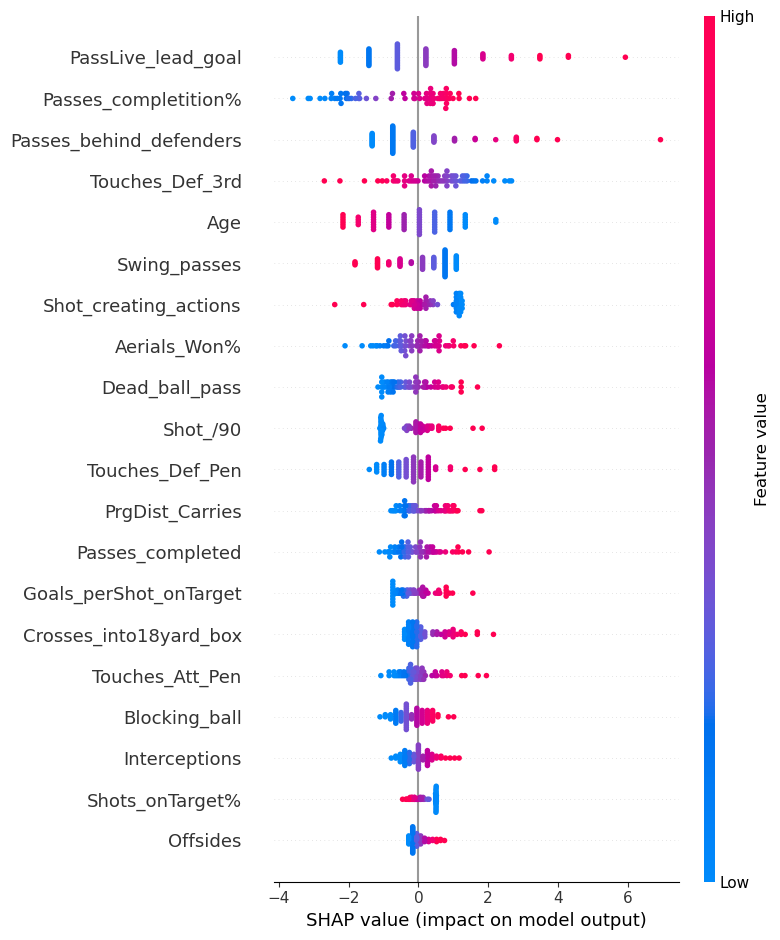

OFF MID XGB SHAP


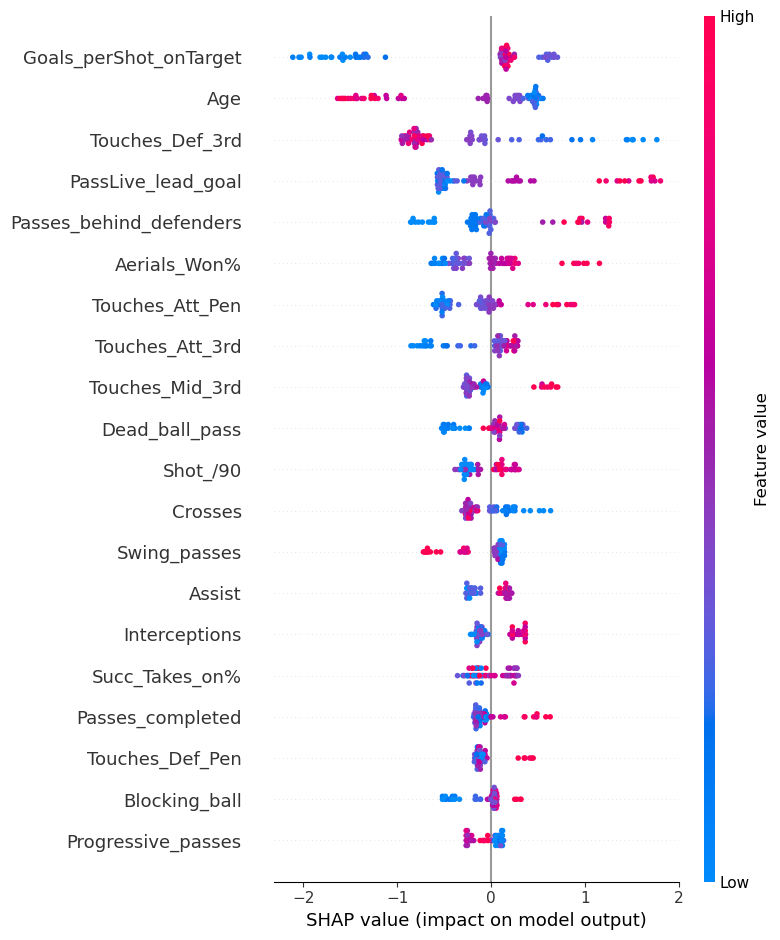

DEF MID Logistic SHAP


C:\Users\jsava\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


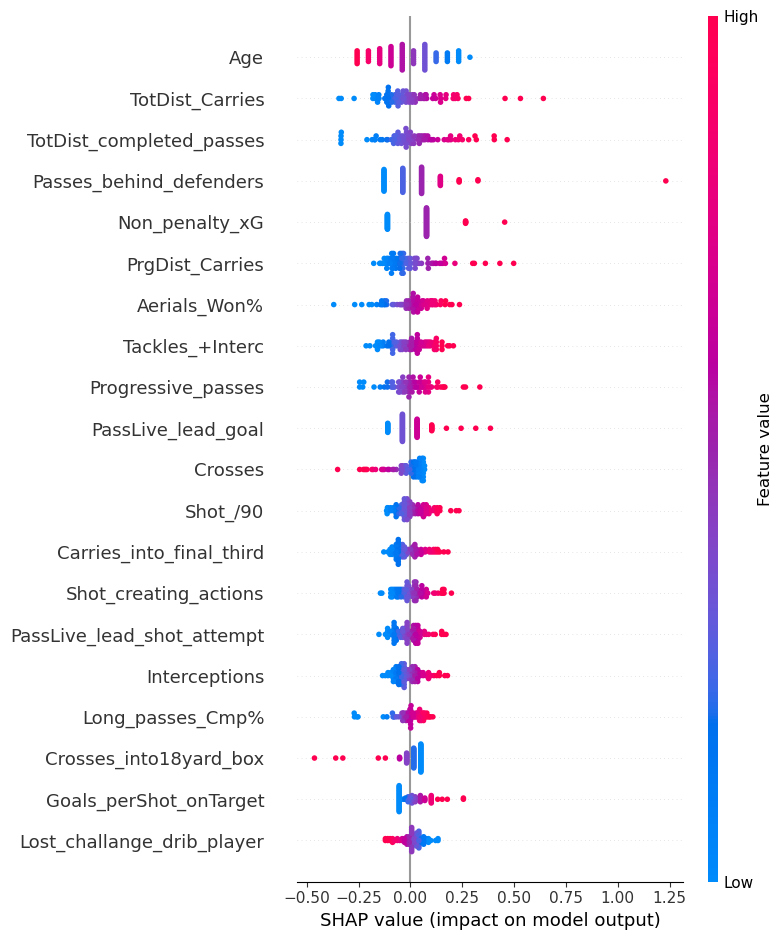

DEF MID XGB SHAP


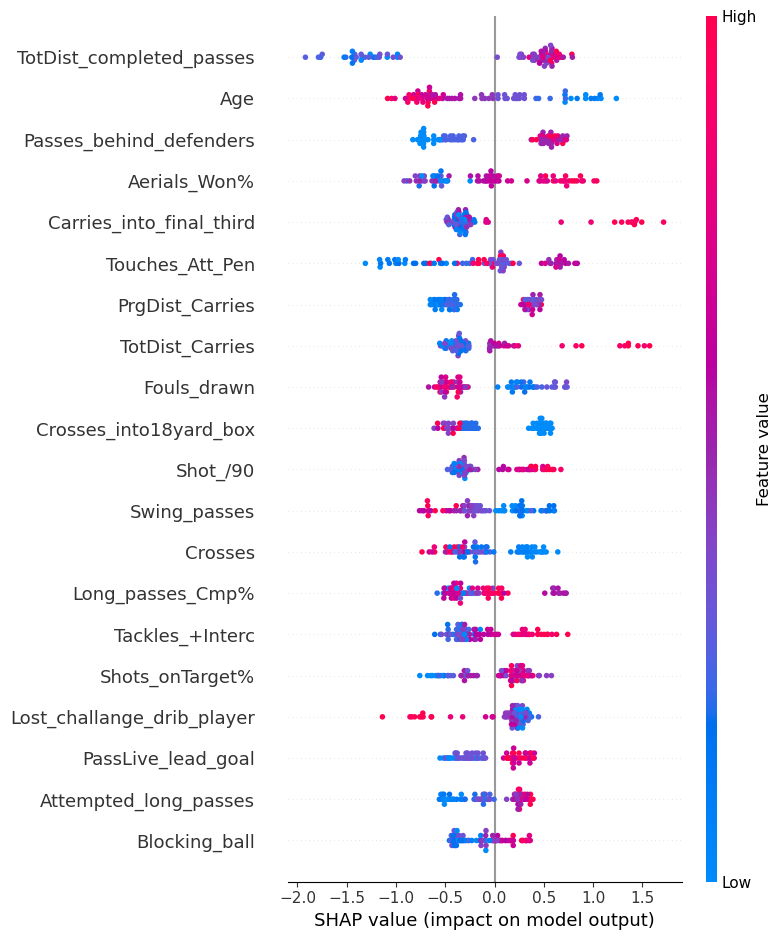

In [124]:
OFF_BG = Xtr_off.sample(min(120, len(Xtr_off)), random_state=42)
OFF_EX = Xte_off.sample(min(120, len(Xte_off)), random_state=42)

DEF_BG = Xtr_def.sample(min(120, len(Xtr_def)), random_state=42)
DEF_EX = Xte_def.sample(min(120, len(Xte_def)), random_state=42)

print("OFF MID Logistic SHAP")
_ = shap_for_logistic(off_log, OFF_BG, OFF_EX, FEATURES_OFF, max_display=20)

print("OFF MID XGB SHAP")
_ = shap_for_xgb(off_xgb, OFF_BG, OFF_EX, FEATURES_OFF, max_display=20)

print("DEF MID Logistic SHAP")
_ = shap_for_logistic(def_log, DEF_BG, DEF_EX, FEATURES_DEF, max_display=20)

print("DEF MID XGB SHAP")
_ = shap_for_xgb(def_xgb, DEF_BG, DEF_EX, FEATURES_DEF, max_display=20)


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def shap_summary_bar(
    shap_values,
    feature_names,
    top_k=20,
    title="SHAP summary: average impact on model output"
):
    """
    SHAP summary bar plot (mean absolute SHAP value).
    """

    mean_abs_shap = np.abs(shap_values).mean(axis=0)

    df = (
        pd.DataFrame({
            "feature": feature_names,
            "mean_abs_shap": mean_abs_shap
        })
        .sort_values("mean_abs_shap", ascending=False)
        .head(top_k)
    )

    plt.figure(figsize=(8, 5))
    plt.barh(df["feature"][::-1], df["mean_abs_shap"][::-1])
    plt.xlabel("Mean |SHAP value| (average impact on model output)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return df


C:\Users\jsava\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


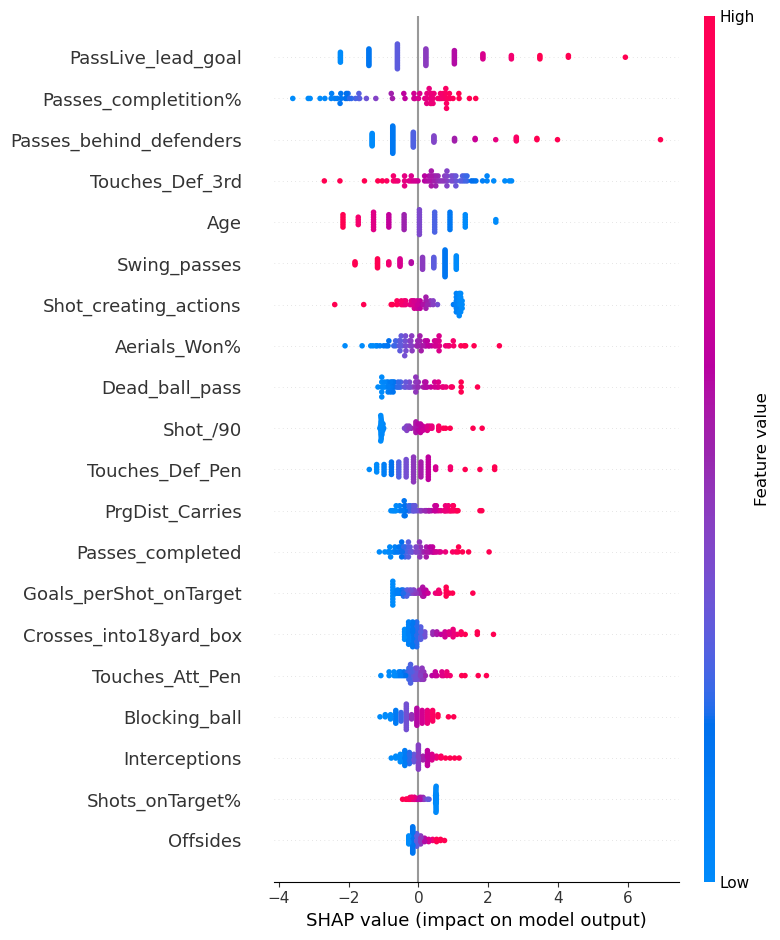

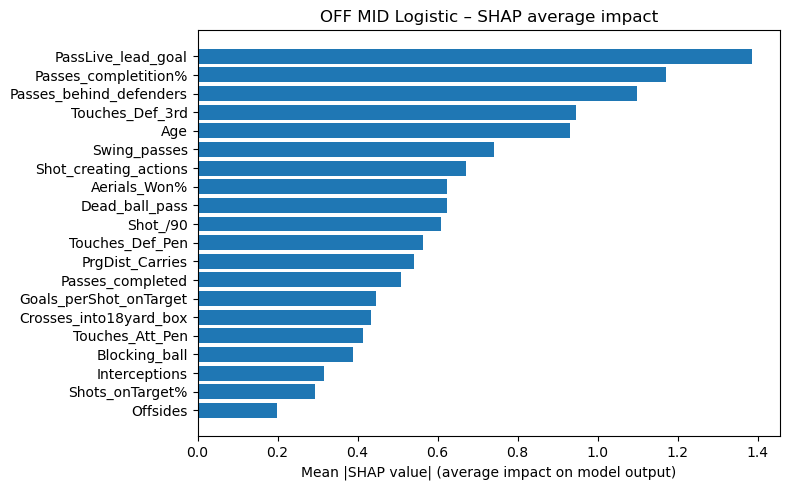

,feature,mean_abs_shap
20,PassLive_lead_goal,1.386841
10,Passes_completition%,1.171498
32,Passes_behind_defenders,1.099443
39,Touches_Def_3rd,0.945269
0,Age,0.930764
33,Swing_passes,0.741718
21,Shot_creating_actions,0.670467
23,Aerials_Won%,0.624271
31,Dead_ball_pass,0.623716
6,Shot_/90,0.608210


In [126]:
shap_off_log = shap_for_logistic(
    off_log,
    OFF_BG,
    OFF_EX,
    FEATURES_OFF,
    max_display=20
)

shap_summary_bar(
    shap_off_log,
    FEATURES_OFF,
    top_k=20,
    title="OFF MID Logistic – SHAP average impact"
)


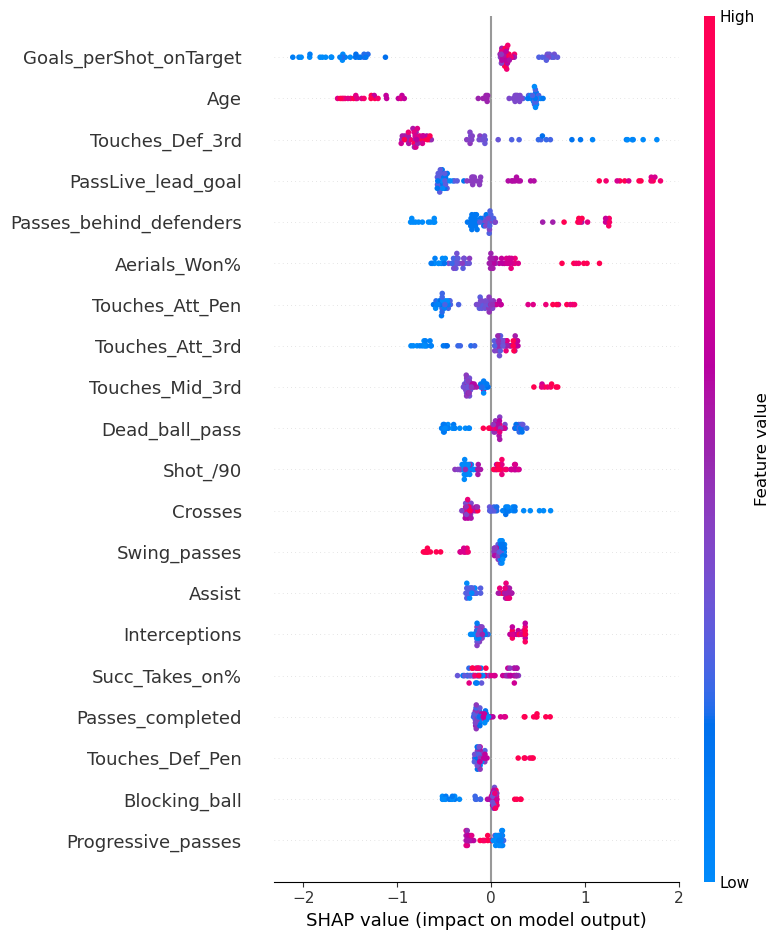

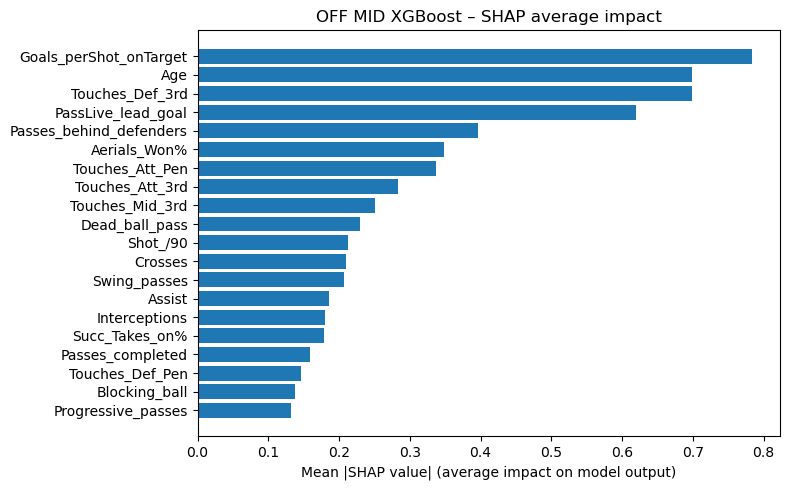

,feature,mean_abs_shap
7,Goals_perShot_onTarget,0.783889
0,Age,0.699209
39,Touches_Def_3rd,0.698239
20,PassLive_lead_goal,0.619469
32,Passes_behind_defenders,0.396898
23,Aerials_Won%,0.347961
42,Touches_Att_Pen,0.337320
41,Touches_Att_3rd,0.283846
40,Touches_Mid_3rd,0.250728
31,Dead_ball_pass,0.229128


In [127]:
shap_off_xgb = shap_for_xgb(
    off_xgb,
    OFF_BG,
    OFF_EX,
    FEATURES_OFF,
    max_display=20
)

shap_summary_bar(
    shap_off_xgb,
    FEATURES_OFF,
    top_k=20,
    title="OFF MID XGBoost – SHAP average impact"
)


C:\Users\jsava\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


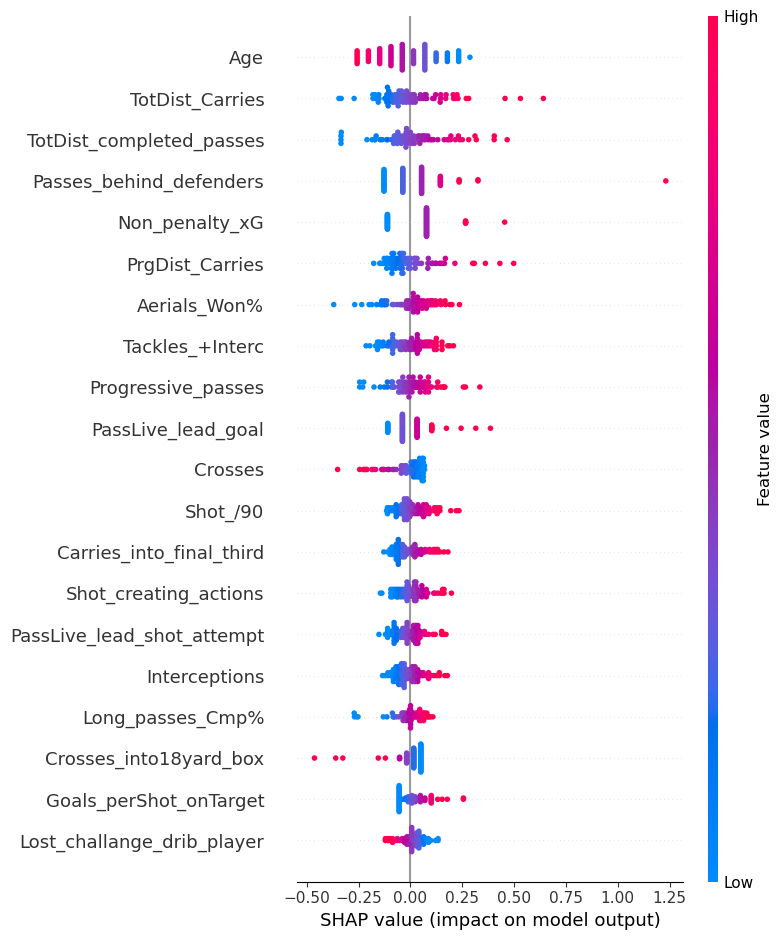

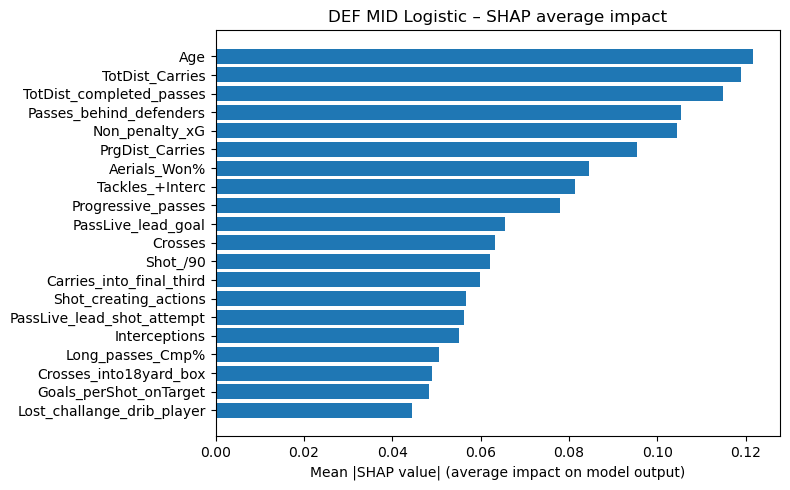

,feature,mean_abs_shap
0,Age,0.121656
20,TotDist_Carries,0.118808
16,TotDist_completed_passes,0.114747
42,Passes_behind_defenders,0.105410
4,Non_penalty_xG,0.104462
21,PrgDist_Carries,0.095412
31,Aerials_Won%,0.084598
39,Tackles_+Interc,0.081332
15,Progressive_passes,0.077957
28,PassLive_lead_goal,0.065555


In [128]:
shap_def_log = shap_for_logistic(
    def_log,
    DEF_BG,
    DEF_EX,
    FEATURES_DEF,
    max_display=20
)

shap_summary_bar(
    shap_def_log,
    FEATURES_DEF,
    top_k=20,
    title="DEF MID Logistic – SHAP average impact"
)


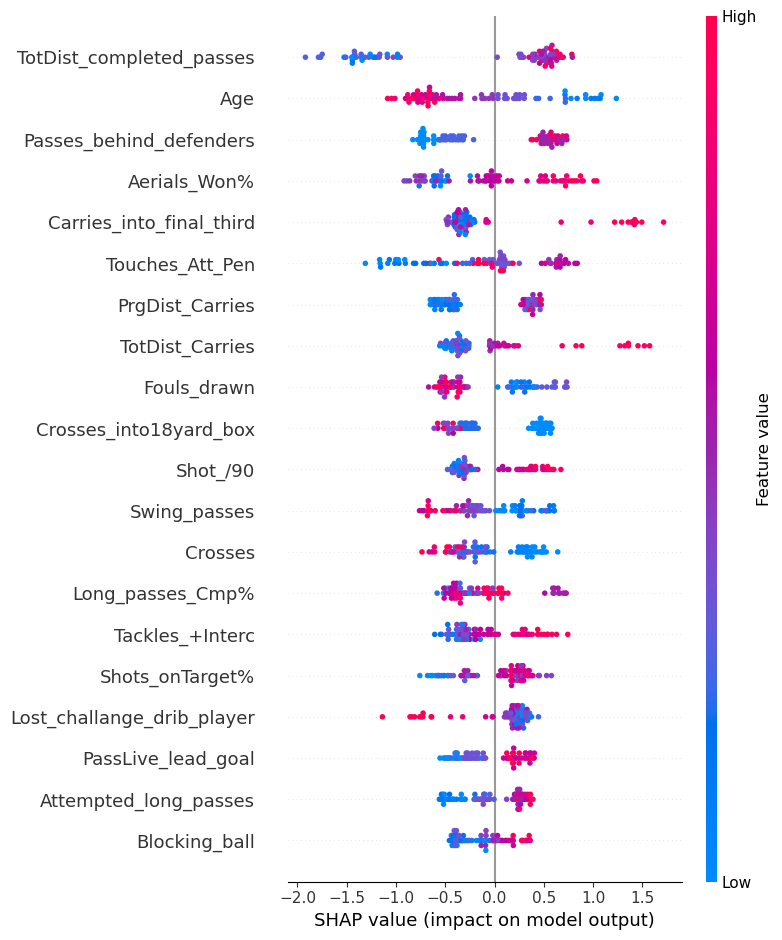

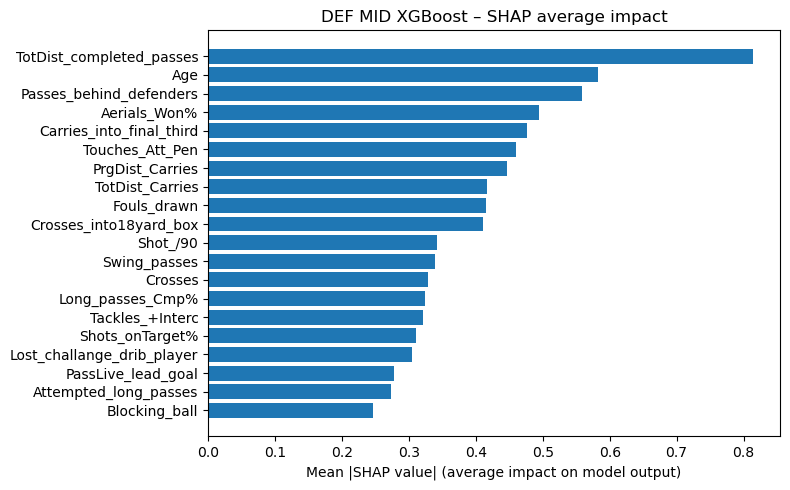

,feature,mean_abs_shap
16,TotDist_completed_passes,0.813651
0,Age,0.582611
42,Passes_behind_defenders,0.558602
31,Aerials_Won%,0.494084
23,Carries_into_final_third,0.477080
47,Touches_Att_Pen,0.459346
21,PrgDist_Carries,0.446311
20,TotDist_Carries,0.417116
33,Fouls_drawn,0.415193
14,Crosses_into18yard_box,0.411155


In [129]:
shap_def_xgb = shap_for_xgb(
    def_xgb,
    DEF_BG,
    DEF_EX,
    FEATURES_DEF,
    max_display=20
)

shap_summary_bar(
    shap_def_xgb,
    FEATURES_DEF,
    top_k=20,
    title="DEF MID XGBoost – SHAP average impact"
)


In [130]:
# Permutation importance tables

# OFF MID
off_log_pi_auc = permutation_importance_table(off_log, Xte_off, yte_off, FEATURES_OFF, scoring="roc_auc", n_repeats=30)
off_xgb_pi_auc = permutation_importance_table(off_xgb, Xte_off, yte_off, FEATURES_OFF, scoring="roc_auc", n_repeats=30)
off_mlp_pi_auc = permutation_importance_table(off_mlp, Xte_off, yte_off, FEATURES_OFF, scoring="roc_auc", n_repeats=30)

off_log_pi_ndcg = permutation_importance_table(off_log, Xte_off, yte_off, FEATURES_OFF, scoring=ndcg20_scorer, n_repeats=30)
off_xgb_pi_ndcg = permutation_importance_table(off_xgb, Xte_off, yte_off, FEATURES_OFF, scoring=ndcg20_scorer, n_repeats=30)
off_mlp_pi_ndcg = permutation_importance_table(off_mlp, Xte_off, yte_off, FEATURES_OFF, scoring=ndcg20_scorer, n_repeats=30)

# DEF MID
def_log_pi_auc = permutation_importance_table(def_log, Xte_def, yte_def, FEATURES_DEF, scoring="roc_auc", n_repeats=30)
def_xgb_pi_auc = permutation_importance_table(def_xgb, Xte_def, yte_def, FEATURES_DEF, scoring="roc_auc", n_repeats=30)
def_mlp_pi_auc = permutation_importance_table(def_mlp, Xte_def, yte_def, FEATURES_DEF, scoring="roc_auc", n_repeats=30)

def_log_pi_ndcg = permutation_importance_table(def_log, Xte_def, yte_def, FEATURES_DEF, scoring=ndcg20_scorer, n_repeats=30)
def_xgb_pi_ndcg = permutation_importance_table(def_xgb, Xte_def, yte_def, FEATURES_DEF, scoring=ndcg20_scorer, n_repeats=30)
def_mlp_pi_ndcg = permutation_importance_table(def_mlp, Xte_def, yte_def, FEATURES_DEF, scoring=ndcg20_scorer, n_repeats=30)

# Save
off_log_pi_auc.to_csv("OFF_MID_logistic_perm_auc.csv", index=False)
off_xgb_pi_auc.to_csv("OFF_MID_xgb_perm_auc.csv", index=False)
off_mlp_pi_auc.to_csv("OFF_MID_mlp_perm_auc.csv", index=False)

off_log_pi_ndcg.to_csv("OFF_MID_logistic_perm_ndcg20.csv", index=False)
off_xgb_pi_ndcg.to_csv("OFF_MID_xgb_perm_ndcg20.csv", index=False)
off_mlp_pi_ndcg.to_csv("OFF_MID_mlp_perm_ndcg20.csv", index=False)

def_log_pi_auc.to_csv("DEF_MID_logistic_perm_auc.csv", index=False)
def_xgb_pi_auc.to_csv("DEF_MID_xgb_perm_auc.csv", index=False)
def_mlp_pi_auc.to_csv("DEF_MID_mlp_perm_auc.csv", index=False)

def_log_pi_ndcg.to_csv("DEF_MID_logistic_perm_ndcg20.csv", index=False)
def_xgb_pi_ndcg.to_csv("DEF_MID_xgb_perm_ndcg20.csv", index=False)
def_mlp_pi_ndcg.to_csv("DEF_MID_mlp_perm_ndcg20.csv", index=False)


off_log_pi_ndcg.head(15), off_xgb_pi_ndcg.head(15), off_mlp_pi_ndcg.head(15), def_log_pi_ndcg.head(15), def_xgb_pi_ndcg.head(15), def_mlp_pi_ndcg.head(15)


(                       feature  importance_mean  importance_std
 0           PassLive_lead_goal         0.134017        0.067187
 1         Passes_completition%         0.124577        0.041793
 2      Passes_behind_defenders         0.100078        0.064644
 3                     Shot_/90         0.068211        0.023174
 4       Goals_perShot_onTarget         0.037975        0.026398
 5               Dead_ball_pass         0.024690        0.035485
 6              Touches_Def_Pen         0.019033        0.029896
 7              Fouls_committed         0.017257        0.018233
 8   PassLive_lead_shot_attempt         0.015622        0.021156
 9               Non_penalty_xG         0.011362        0.016996
 10             Touches_Def_3rd         0.011210        0.033115
 11        Tackles_on_dribblers         0.008563        0.018588
 12                Corner_kikcs         0.008060        0.021417
 13                     Crosses         0.005351        0.018435
 14                 Fouls

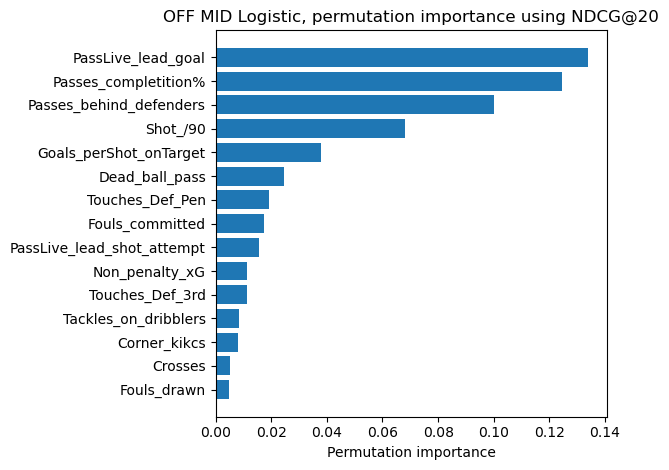

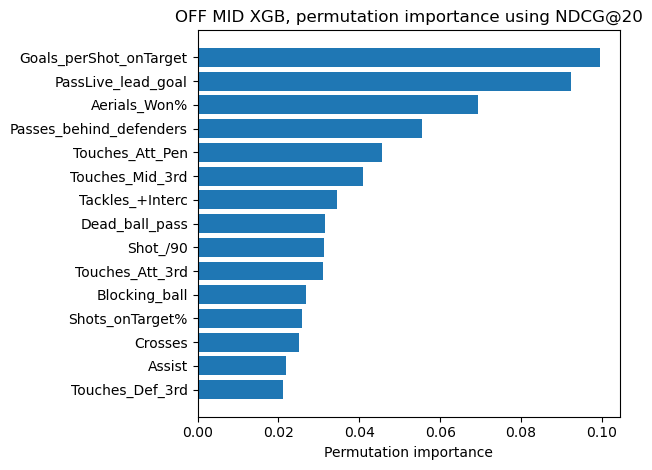

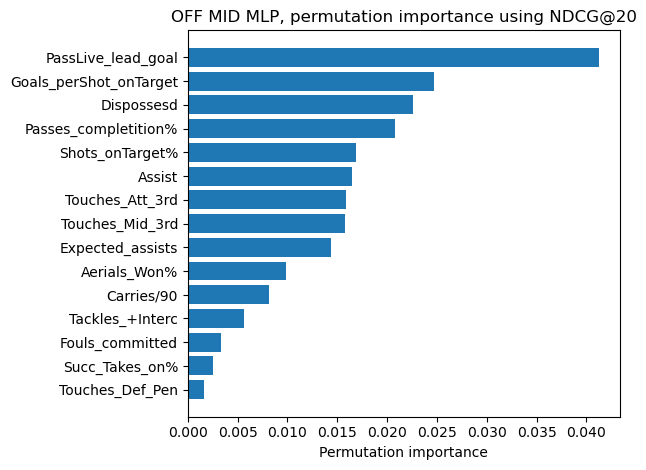

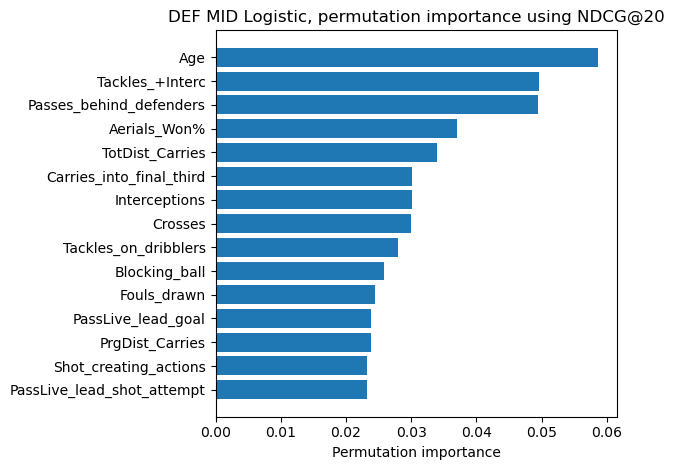

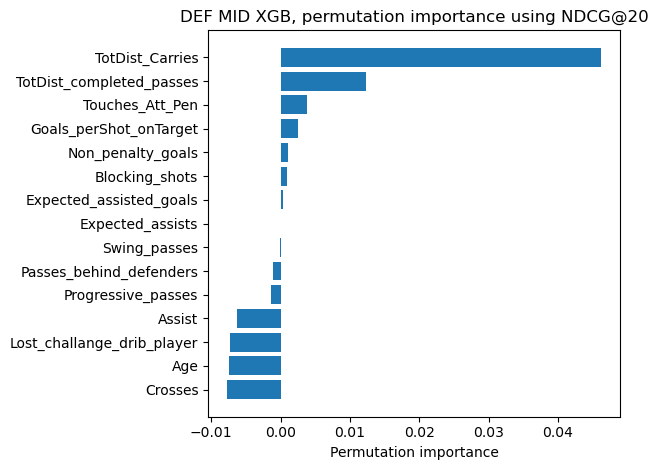

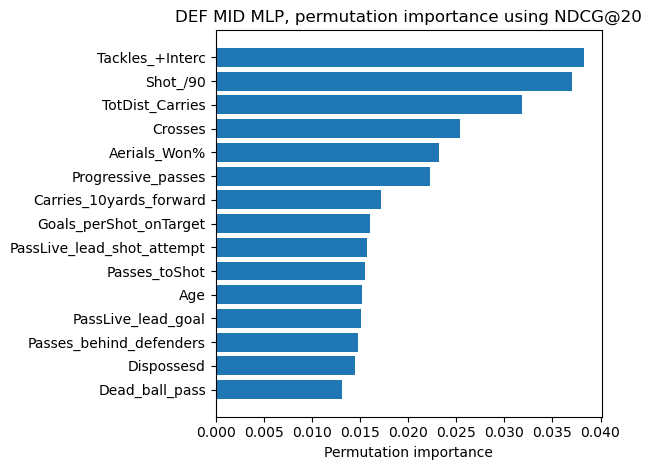

In [131]:
def plot_top_perm(imp_df, title, top_n=15):
    top = imp_df.head(top_n).iloc[::-1]
    plt.figure()
    plt.barh(top["feature"], top["importance_mean"])
    plt.title(title)
    plt.xlabel("Permutation importance")
    plt.tight_layout()
    plt.show()

plot_top_perm(off_log_pi_ndcg, "OFF MID Logistic, permutation importance using NDCG@20")
plot_top_perm(off_xgb_pi_ndcg, "OFF MID XGB, permutation importance using NDCG@20")
plot_top_perm(off_mlp_pi_ndcg, "OFF MID MLP, permutation importance using NDCG@20")

plot_top_perm(def_log_pi_ndcg, "DEF MID Logistic, permutation importance using NDCG@20")
plot_top_perm(def_xgb_pi_ndcg, "DEF MID XGB, permutation importance using NDCG@20")
plot_top_perm(def_mlp_pi_ndcg, "DEF MID MLP, permutation importance using NDCG@20")
